![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de popularidad en canción

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desarrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de popularidad en canción".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/competitions/miad-2025-12-prediccion-popularidad-en-cancion).

## Datos para la predicción de popularidad en cancion

En este proyecto se usará el conjunto de datos de datos de popularidad en canciones, donde cada observación representa una canción y se tienen variables como: duración de la canción, acusticidad y tempo, entre otras. El objetivo es predecir qué tan popular es la canción. Para más detalles puede visitar el siguiente enlace: [datos](https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Importación librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from collections import Counter
import re
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import statsmodels.api as sm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, mean_squared_error,  r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import joblib

from sklearn.model_selection import GridSearchCV
!pip install optuna
import optuna

In [3]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTrain_Spotify.csv')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTest_Spotify.csv', index_col=0)

In [10]:
dataTraining.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'popularity'],
      dtype='object')

In [9]:
dataTraining.describe()

,Unnamed: 0,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
count,79800.000000,7.980000e+04,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000
mean,39899.500000,2.279022e+05,0.567318,0.641529,5.307043,-8.263741,0.637732,0.084750,0.314979,0.157319,0.213313,0.474267,122.076559,3.902556,33.265301
std,23036.420078,1.050599e+05,0.173110,0.251441,3.562186,5.035504,0.480659,0.105657,0.332512,0.310792,0.190075,0.259010,29.941937,0.434284,22.330871
min,0.000000,1.338600e+04,0.000000,0.000019,0.000000,-49.307000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19949.750000,1.744360e+05,0.456000,0.472000,2.000000,-10.006000,0.000000,0.035900,0.017000,0.000000,0.097900,0.261000,99.081250,4.000000,17.000000
50%,39899.500000,2.128130e+05,0.581000,0.685000,5.000000,-7.012000,1.000000,0.049000,0.169000,0.000041,0.132000,0.464000,122.009000,4.000000,35.000000
75%,59849.250000,2.614260e+05,0.695000,0.854000,8.000000,-5.000000,1.000000,0.084500,0.598000,0.050500,0.273000,0.684000,140.054000,4.000000,50.000000
max,79799.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,222.605000,5.000000,100.000000


In [ ]:
#dataTraining.count()

,0
Unnamed: 0,79800
track_id,79800
artists,79800
album_name,79800
track_name,79800
duration_ms,79800
explicit,79800
danceability,79800
energy,79800
key,79800


In [ ]:
#dataTesting.count()

,0
track_id,34200
artists,34199
album_name,34199
track_name,34199
duration_ms,34200
explicit,34200
danceability,34200
energy,34200
key,34200
loudness,34200


In [ ]:
# Visualización datos de entrenamiento
dataTraining.head()

,Unnamed: 0,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity
0,0,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,...,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,22
1,1,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,...,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,22
2,2,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,...,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,37
3,3,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,...,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,4,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,...,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,27


In [ ]:
# Visualización datos de test
dataTesting.head()

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,6KwkVtXm8OUp2XffN5k7lY,Hillsong Worship,No Other Name,No Other Name,440247,False,0.369,0.598,7,-6.984,1,0.0304,0.00511,0.000000,0.176,0.0466,148.014,4,world-music
1,2dp5I5MJ8bQQHDoFaNRFtX,Internal Rot,Grieving Birth,Failed Organum,93933,False,0.171,0.997,7,-3.586,1,0.1180,0.00521,0.801000,0.420,0.0294,122.223,4,grindcore
2,5avw06usmFkFrPjX8NxC40,Zhoobin Askarieh;Ali Sasha,Noise A Noise 20.4-1,"Save the Trees, Pt. 1",213578,False,0.173,0.803,9,-10.071,0,0.1440,0.61300,0.001910,0.195,0.0887,75.564,3,iranian
3,75hT0hvlESnDJstem0JgyR,Bryan Adams,All I Want For Christmas Is You,Merry Christmas,151387,False,0.683,0.511,6,-5.598,1,0.0279,0.40600,0.000197,0.111,0.5980,109.991,3,rock
4,4bY2oZGA5Br3pTE1Jd1IfY,Nogizaka46,バレッタ TypeD,月の大きさ,236293,False,0.555,0.941,9,-3.294,0,0.0481,0.48400,0.000000,0.266,0.8130,92.487,4,j-idol


In [ ]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
#np.random.seed(42)
#y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 100, index=dataTesting.index, columns=['Popularity'])

In [ ]:
# Guardar predicciones en formato exigido en la competencia de kaggle
#y_pred.to_csv('test_submission_file.csv', index_label='ID')
#y_pred.head()

### Analisis de Datos

#### Revision de Columnas de train y test

In [ ]:
#Eliminar la primer columna del dataframe
dataTraining = dataTraining.iloc[:, 1:]
# Eliminar la columna track_id de train y test
dataTraining=dataTraining.drop(columns=["track_id"], errors="ignore")
dataTesting=dataTesting.drop(columns=["track_id"], errors="ignore")
#Revisar las columnas del dataframe de train
dataTraining.columns

Index(['artists', 'album_name', 'track_name', 'duration_ms', 'explicit',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'track_genre', 'popularity'],
      dtype='object')

In [ ]:
#Revisar las columnas del dataframe de test
dataTesting.columns

Index(['artists', 'album_name', 'track_name', 'duration_ms', 'explicit',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'track_genre'],
      dtype='object')

#### Revisar la informacion de train

In [ ]:
# Tamaño del dataset
dataTraining.shape

(79800, 19)

In [ ]:
# Tipos de datos y valores nulos
dataTraining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           79800 non-null  object 
 1   album_name        79800 non-null  object 
 2   track_name        79800 non-null  object 
 3   duration_ms       79800 non-null  int64  
 4   explicit          79800 non-null  bool   
 5   danceability      79800 non-null  float64
 6   energy            79800 non-null  float64
 7   key               79800 non-null  int64  
 8   loudness          79800 non-null  float64
 9   mode              79800 non-null  int64  
 10  speechiness       79800 non-null  float64
 11  acousticness      79800 non-null  float64
 12  instrumentalness  79800 non-null  float64
 13  liveness          79800 non-null  float64
 14  valence           79800 non-null  float64
 15  tempo             79800 non-null  float64
 16  time_signature    79800 non-null  int64 

**Analisis**

* Tamaño del dataset: 79,800 registros y 20 columnas.

* Valores nulos: Ningún valor nulo en las columnas (completo).

In [ ]:
# Estadísticas descriptivas de variables numéricas
dataTraining.describe()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
count,7.980000e+04,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000
mean,2.279022e+05,0.567318,0.641529,5.307043,-8.263741,0.637732,0.084750,0.314979,0.157319,0.213313,0.474267,122.076559,3.902556,33.265301
std,1.050599e+05,0.173110,0.251441,3.562186,5.035504,0.480659,0.105657,0.332512,0.310792,0.190075,0.259010,29.941937,0.434284,22.330871
min,1.338600e+04,0.000000,0.000019,0.000000,-49.307000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.744360e+05,0.456000,0.472000,2.000000,-10.006000,0.000000,0.035900,0.017000,0.000000,0.097900,0.261000,99.081250,4.000000,17.000000
50%,2.128130e+05,0.581000,0.685000,5.000000,-7.012000,1.000000,0.049000,0.169000,0.000041,0.132000,0.464000,122.009000,4.000000,35.000000
75%,2.614260e+05,0.695000,0.854000,8.000000,-5.000000,1.000000,0.084500,0.598000,0.050500,0.273000,0.684000,140.054000,4.000000,50.000000
max,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,222.605000,5.000000,100.000000


**Analisis**

* duration_ms: Promedio de 227,902 ms (~3.8 min), rango entre 13,386 ms y 5,237,295 ms, mayor duración entre 2-3 minutos.

* danceability: Promedio de 0.57, rango de 0.00 a 0.985, mayoría con bailabilidad moderada (0.45-0.70).

* energy: Promedio de 0.64, rango de 0.00 a 1.00, mayoría con energía moderada a alta.

* key: Promedio de 5.31, rango de 0 a 11, tonalidad predominante en C y sus cercanos.

* loudness: Promedio de -8.26 dB, rango de -49.31 dB a 4.53 dB, mayoría entre -10 y -5 dB.

* mode: Promedio de 0.64, 64% en tonalidad mayor (modo = 1), el resto menor (modo = 0).

* speechiness: Promedio de 0.08, rango de 0.00 a 0.97, mayoría sin o poca presencia de habla.

* acousticness: Promedio de 0.31, rango de 0.00 a 1.00, mayoría con carácter no completamente acústico.

* instrumentalness: Promedio de 0.16, rango de 0.00 a 1.00, mayoría con voces presentes.

* liveness: Promedio de 0.21, rango de 0.00 a 1.00, pocas grabaciones en vivo.

* valence: Promedio de 0.47, rango de 0.00 a 1.00, mayoría de pistas equilibradas entre positivas y negativas.

* tempo: Promedio de 122 BPM, rango de 0 a 222.61 BPM, mayoría entre 100 y 140 BPM.

* time_signature: Promedio de 3.90, rango de 3 a 7, mayoría en firma de tiempo 4/4.

* popularity: Promedio de 33.27, rango de 0 a 100, mayoría con popularidad baja, cerca de 0.

#### Creación de variables nuevas para test y train

##### Variable de Genero

* A continuación, se creará una variable de género musical que sintetice, de forma genérica, los géneros ya existentes en la variable original. El objetivo es reducir el número de categorías, facilitando así su uso en los modelos y mejorando su practicidad para el análisis.

In [ ]:
# Creación de variable genero de la variable track_genre
diccionario = {
    # Rock / Alternativo
    'rock': 'rock_alternativo', 'hard-rock': 'rock_alternativo', 'punk': 'rock_alternativo',
    'punk-rock': 'rock_alternativo', 'rock-n-roll': 'rock_alternativo', 'grunge': 'rock_alternativo',
    'alt-rock': 'rock_alternativo', 'garage': 'rock_alternativo', 'psych-rock': 'rock_alternativo',
    'indie': 'rock_alternativo', 'indie-pop': 'rock_alternativo', 'alternative': 'rock_alternativo',
    'metal': 'rock_alternativo', 'metalcore': 'rock_alternativo', 'heavy-metal': 'rock_alternativo',
    'death-metal': 'rock_alternativo', 'black-metal': 'rock_alternativo', 'hardcore': 'rock_alternativo',
    'groove': 'rock_alternativo', 'rockabilly': 'rock_alternativo', 'grindcore': 'rock_alternativo',  'ska': 'rock_alternativo',

    # Electrónica / Dance
    'edm': 'electronica', 'electronic': 'electronica', 'electro': 'electronica',
    'techno': 'electronica', 'deep-house': 'electronica', 'house': 'electronica',
    'progressive-house': 'electronica', 'minimal-techno': 'electronica', 'club': 'electronica',
    'trance': 'electronica', 'detroit-techno': 'electronica', 'drum-and-bass': 'electronica',
    'breakbeat': 'electronica', 'ambient': 'electronica', 'trip-hop': 'electronica',
    'disco': 'electronica', 'synth-pop': 'electronica', 'dance': 'electronica',
    'dancehall': 'electronica', 'hardstyle': 'electronica', 'chicago-house': 'electronica',  'dubstep': 'electronica', 'dub': 'electronica',

    # Pop / Mainstream
    'pop': 'pop_mainstream', 'pop-film': 'pop_mainstream', 'party': 'pop_mainstream',
    'happy': 'pop_mainstream', 'k-pop': 'pop_mainstream', 'j-pop': 'pop_mainstream',
    'cantopop': 'pop_mainstream', 'mandopop': 'pop_mainstream', 'singer-songwriter': 'pop_mainstream',
    'songwriter': 'pop_mainstream', 'power-pop': 'pop_mainstream',

    # Hip-Hop / R&B / Funk / Soul
    'hip-hop': 'hiphop_rnb', 'rap': 'hiphop_rnb', 'r-n-b': 'hiphop_rnb',
    'funk': 'hiphop_rnb', 'soul': 'hiphop_rnb',

    # Clásica / Jazz / Instrumental
    'classical': 'clasica_jazz', 'opera': 'clasica_jazz', 'piano': 'clasica_jazz',
    'jazz': 'clasica_jazz', 'blues': 'clasica_jazz',

    # Latino / Regional
    'latin': 'latino', 'latino': 'latino', 'reggaeton': 'latino', 'salsa': 'latino',
    'brazil': 'latino', 'mpb': 'latino', 'pagode': 'latino', 'sertanejo': 'latino',
    'forro': 'latino', 'samba': 'latino', 'spanish': 'latino', 'tango': 'latino', 'reggae': 'latino',

    # Folklore / Country / World
    'folk': 'folk_world', 'country': 'folk_world', 'bluegrass': 'folk_world',
    'honky-tonk': 'folk_world', 'world-music': 'folk_world', 'afrobeat': 'folk_world',
    'malay': 'folk_world', 'iranian': 'folk_world', 'indian': 'folk_world',
    'turkish': 'folk_world', 'gospel': 'folk_world', 'acoustic': 'folk_world', 'guitar': 'folk_world',

    # Experimental / Indie Oscuro
    'emo': 'experimental', 'sad': 'experimental', 'goth': 'experimental',
    'idm': 'experimental', 'industrial': 'experimental', 'psych-rock': 'experimental',
    'chill': 'experimental',

    # Temáticos / Entretenimiento
    'anime': 'tematicos', 'comedy': 'tematicos', 'disney': 'tematicos',
    'show-tunes': 'tematicos', 'romance': 'tematicos', 'study': 'tematicos',
    'sleep': 'tematicos', 'new-age': 'tematicos', 'j-idol': 'tematicos',

    # Niños
    'kids': 'ninos', 'children': 'ninos',

    # Otros / Nacionales / Culturales
    'german': 'otros', 'swedish': 'otros', 'j-rock': 'otros', 'j-dance': 'otros',
    'british': 'otros',  'french': 'otros'}

In [ ]:
#Creacion de variable genero detallado en train y en test
dataTraining['Genero_ampliado'] = dataTraining['track_genre'].map(diccionario)
dataTesting['Genero_ampliado'] = dataTesting['track_genre'].map(diccionario)

# Eliminar la columna original
dataTraining.drop(columns=["track_genre"], inplace=True, errors="ignore")
dataTesting.drop(columns=["track_genre"], inplace=True, errors="ignore")

In [ ]:
#Se revisan los valores unicos de la columna Genero Ampliado
dataTraining['Genero_ampliado'].unique()

array(['experimental', 'clasica_jazz', 'electronica', 'pop_mainstream',
       'folk_world', 'tematicos', 'latino', 'ninos', 'rock_alternativo',
       'otros', 'hiphop_rnb'], dtype=object)

* Al realizar el procedimiento, se obtienen 11 generos musicales, lo cual reduce y agrupa en gran medida la variable original

##### Variable del nombre de la cancion

* A continuación, se crea una variable correspondiente al nombre de la canción. Como se ha observado en la base de datos, esta variable contiene textos de los cuales es difícil extraer un provecho significativo. Por ello, se genera un código que realiza un conteo de las palabras más repetidas, con el objetivo de identificar términos frecuentes que permitan crear categorías basadas en las palabras más utilizadas. Cabe aclarar que no se tendrán en cuenta palabras conectoras o aquellas que no se consideren relevantes para el ejercicio, ya que no aportan valor a la clasificación del nombre de la canción.



In [ ]:
#Se indican en una lista las palabras mas comunes dentro de las canciones para ignorar mas adelante
stopwords = {"de", "y", "a", "que", "la", "para", "en", "el", "los", "las", "un", "una", "con", "por", "del", "al", "the", "in",
             "ao","of", "to", "it", "no", "from", "on", "for", "and", "is", "do", "eu", "you", "me", "my", "your", "we", "be", "all",
             "this", "that", "like", "at", "one", "what", "can", "go", "don", "up", "down", "out", "re", "the", "song", "with","let",
             "little", "are", "se", "na", "so", "by", "mi", "never", "get", "come", "way", "tu", "over", "back", "know", "te", "da",
             "good", "man", "home", "feel", "girl", "when", "again", "new", "if", "not", "will", "just", "é", "op", "pt", "pra"}

#en un conjunto se indican las letras de union de las canciones para ignorar mas adelante
letras_sueltas = set("abcdefghijklmnopqrstuvwxyz")

#Funcion para contar las palabras que se repiten en la columna track name solo las utiles
def contar_palabras(df, columna):
    #Funcion para extraer las palabras de cada fila de la columna track name solo las utiles
    def extraer_palabras(texto):
        texto = texto.lower()
        palabras = re.findall(r'\b[a-zA-Záéíóúüñ]+\b', texto)
        return [palabra for palabra in palabras if palabra not in stopwords and palabra not in letras_sueltas]

    # Contar palabras en la columna seleccionada
    todas_las_palabras = [
        palabra for texto in df[columna].dropna()
        for palabra in extraer_palabras(texto)]

    return Counter(todas_las_palabras)

# Obtener el conteo
conteo_palabras = contar_palabras(dataTraining, "track_name")

# Ordenar por frecuencia (de mayor a menor)
conteo_ordenado = conteo_palabras.most_common()

# Imprimir de forma horizontal (palabra: frecuencia) las 50 mas repetidas
print(" | ".join([f"{palabra}: {frecuencia}" for palabra, frecuencia in conteo_ordenado[:50]]))

vivo: 2231 | remix: 2059 | feat: 1853 | love: 1780 | christmas: 1387 | mix: 1190 | version: 1171 | live: 1110 | remastered: 903 | edit: 806 | original: 602 | radio: 572 | time: 563 | amor: 530 | night: 436 | remaster: 425 | life: 415 | baby: 392 | run: 355 | last: 352 | heart: 348 | day: 345 | world: 335 | single: 296 | dance: 278 | piano: 260 | rain: 259 | rock: 246 | black: 239 | die: 237 | blue: 235 | soundtrack: 224 | take: 220 | bad: 220 | god: 219 | more: 218 | fire: 214 | extended: 210 | act: 209 | now: 206 | mind: 204 | acoustic: 199 | here: 199 | em: 198 | only: 197 | ll: 192 | dream: 192 | dead: 191 | high: 191 | sun: 190


* Se crean las categorías para la nueva variable, y se asigna la categoría correspondiente cuando se encuentra la palabra clave dentro del nombre de la variable original.

In [ ]:
#se indican las categorias de como quedaran estructuradas los nombres de las canciones
categorias = {
        "produccion": ["remix", "mix", "version", "live", "remastered", "edit", "remaster", "original", "extended", "acoustic", "radio", "single"],
        "colaboracion": ["feat"],
        "romantica": ["love", "amor", "heart", "baby", "dream", "life", "only", "more", "feel", "kiss", "desire"],
        "festiva": ["christmas", "day", "night", "sun", "time"],
        "oscura": ["die", "dead", "black", "blue", "bad", "high", "fire", "mind", "god"],
        "genero_musical": ["dance", "rock", "piano", "acoustic", "soundtrack"],
        "contexto": ["vivo", "world", "rain", "now", "here"],
        "accion_reflexion": ["run", "take", "last", "act", "dream", "mind"]}

In [ ]:
# Ajustar los nombres de las canciones para que se pueda tomar información relevante y se puedan crear categorias mas acotadas y den una mayor respuesta a explicar la variable objetivo

def asignar_categoria(df, columna, categorias):
    df[f"{columna}_actualizado"] = df[columna].apply(
        lambda nombre: next((categoria for categoria, palabras in categorias.items() if any(palabra in nombre.lower() for palabra in palabras)), "otro") if pd.notna(nombre) else "otro")
    return df

# Aplicar la asignación de categorías
dataTraining = asignar_categoria(dataTraining, "track_name", categorias)
dataTesting = asignar_categoria(dataTesting, "track_name", categorias)

In [ ]:
dataTraining['track_name_actualizado'].unique()

array(['otro', 'romantica', 'produccion', 'colaboracion', 'contexto',
       'accion_reflexion', 'festiva', 'oscura', 'genero_musical'],
      dtype=object)

In [ ]:
dataTraining = dataTraining.drop('track_name', axis=1)
dataTesting = dataTesting.drop('track_name', axis=1)

* Al realizar el procedimiento, se obtienen 9 categorias de nombres de variables, lo cual reduce y agrupa en gran medida la variable original

##### Variable de Album

* Se utiliza el mismo procedimiento aplicado a la variable anterior para generar el conteo de palabras, esta vez con el objetivo de crear agrupaciones de álbumes. Para ello, se reutilizan las definiciones previamente establecidas.

In [ ]:
# Obtener el conteo
conteo_palabras = contar_palabras(dataTraining, "album_name")

# Ordenar por frecuencia (de mayor a menor)
conteo_ordenado = conteo_palabras.most_common()
#muestra de manera horizontal las palabras mas repetidas de la numero 100 a la numero 199
print(" | ".join([f"{palabra}: {frecuencia}" for palabra, frecuencia in conteo_ordenado[100:200]]))

white: 166 | rhymes: 166 | mind: 165 | light: 164 | anos: 163 | series: 163 | summer: 163 | sessions: 162 | acoustic: 159 | am: 157 | essential: 157 | radio: 155 | rain: 154 | bonus: 152 | how: 152 | musical: 151 | deep: 151 | karneval: 150 | presents: 150 | nursery: 150 | road: 149 | perreito: 147 | dark: 144 | single: 143 | lo: 143 | death: 142 | super: 140 | vida: 140 | but: 140 | side: 140 | dreams: 140 | classic: 138 | weihnachten: 137 | club: 137 | us: 137 | sin: 136 | dream: 135 | singles: 135 | hop: 135 | film: 134 | tango: 134 | fire: 133 | santa: 132 | hip: 132 | god: 131 | edit: 131 | grandes: 129 | lost: 129 | poco: 129 | grandi: 129 | años: 129 | high: 129 | after: 128 | éxitos: 128 | le: 128 | two: 126 | música: 126 | siempre: 126 | esto: 126 | successi: 125 | roll: 124 | electro: 124 | king: 123 | show: 123 | story: 122 | workout: 122 | queda: 122 | dead: 122 | paes: 121 | big: 120 | gold: 119 | bad: 119 | better: 119 | an: 119 | air: 119 | first: 118 | everything: 118 |

In [ ]:
categorias_album = {
    "produccion": ["remix", "mix", "version", "live", "remastered", "edit", "remaster", "original", "extended", "acoustic", "radio", "single"],
    "especial": ["deluxe", "remastered", "anniversary", "best", "greatest", "hits", "complete", "ultimate", "special", "remaster"],
    "vivo": ["vivo", "live", "acústico", "concert", "performance"],
    "remix": ["remix", "remixes"],
    "tematico": ["christmas", "halloween", "winter", "piano", "classics", "autumn", "season"],
    "compilado": ["collection", "soundtrack", "ep", "playlist", "cast", "album"],
    "genero": ["pop", "rock", "country", "metal", "classical", "alternative", "house", "chill", "soul", "reggaeton"],
    "fiesta": ["party", "dance", "perreo", "baby", "fiesta", "dj", "exitos", "cumpleaños"],
    "infantil": ["kids", "tunes"],
    "atemporal": ["love", "life", "songs", "amor"],
    "single": ["single", "top"],
    "estacional": ["time", "night", "day"],
    "emocional": ["heart", "vibes", "happy", "feliz", "forever"],}

In [ ]:
dataTraining = asignar_categoria(dataTraining, "album_name", categorias_album)
dataTesting = asignar_categoria(dataTesting, "album_name", categorias_album)

In [ ]:
dataTraining = dataTraining.drop('album_name', axis=1)
dataTesting = dataTesting.drop('album_name', axis=1)

In [ ]:
dataTraining['album_name_actualizado'].unique()

array(['genero', 'otro', 'emocional', 'atemporal', 'fiesta', 'produccion',
       'especial', 'estacional', 'tematico', 'compilado', 'vivo',
       'single', 'infantil'], dtype=object)

* Al realizar el procedimiento, se obtienen 13 categorias de albumes, lo cual reduce y agrupa en gran medida la variable original

##### Variable de Nombre del artista

* Para crear esta variable, se tomó como base el conteo de apariciones de los artistas. Aquellos con un conteo superior a 100 se ubicaron en la categoría Top 20; si el conteo se encuentra entre 80 y menos de 100, se clasificaron como Top 40, y así sucesivamente. Para este ejercicio se consideró que el conteo máximo de apariciones es 139 y el mínimo es 1, por lo que se definieron los rangos en función de estos valores. Posteriormente, estos rangos se aplicaron a la variable original, generando categorías que representan los artistas más escuchados.

In [ ]:
def asignar_top_por_rangos(df, columna):
    # Obtener el conteo de canciones por artista
    conteo = df[columna].value_counts()

    # Función para asignar categorías basadas en el número de canciones
    def categorizar(valor):
        if valor > 100:
            return 'Top_20'
        elif valor >= 80:
            return 'Top_40'
        elif valor >= 60:
            return 'Top_60'
        elif valor >= 40:
            return 'Top_80'
        elif valor >= 5:
            return 'Top_100'
        else:
            return 'Tops_otros'  # Para artistas con menos de 5 canciones

    # Asignar la categoría al DataFrame
    categorias = conteo.map(categorizar)

    # Mapear cada artista a su categoría
    df["top_artistas"] = df[columna].map(categorias).fillna("Tops_otros")

    return df

In [ ]:
dataTraining = asignar_top_por_rangos(dataTraining, 'artists')
dataTesting = asignar_top_por_rangos(dataTesting, "artists")

In [ ]:
dataTraining = dataTraining.drop('artists', axis=1)
dataTesting = dataTesting.drop('artists', axis=1)

In [ ]:
dataTraining['top_artistas'].unique()

array(['Tops_otros', 'Top_100', 'Top_20', 'Top_60', 'Top_80', 'Top_40'],
      dtype=object)

* Al realizar el procedimiento, se obtienen 6 categorias de top de artistas mas escuchados, lo cual reduce y agrupa en gran medida la variable original

#### Distribuciones de las variables Numericas

In [ ]:
#Determinar que variables son numericas y cuales categoricas
variables_numericas = [col for col in dataTraining.select_dtypes(["float64", "int64"])]
variables_categoricas = [col for col in dataTraining.select_dtypes(["object","bool"])]

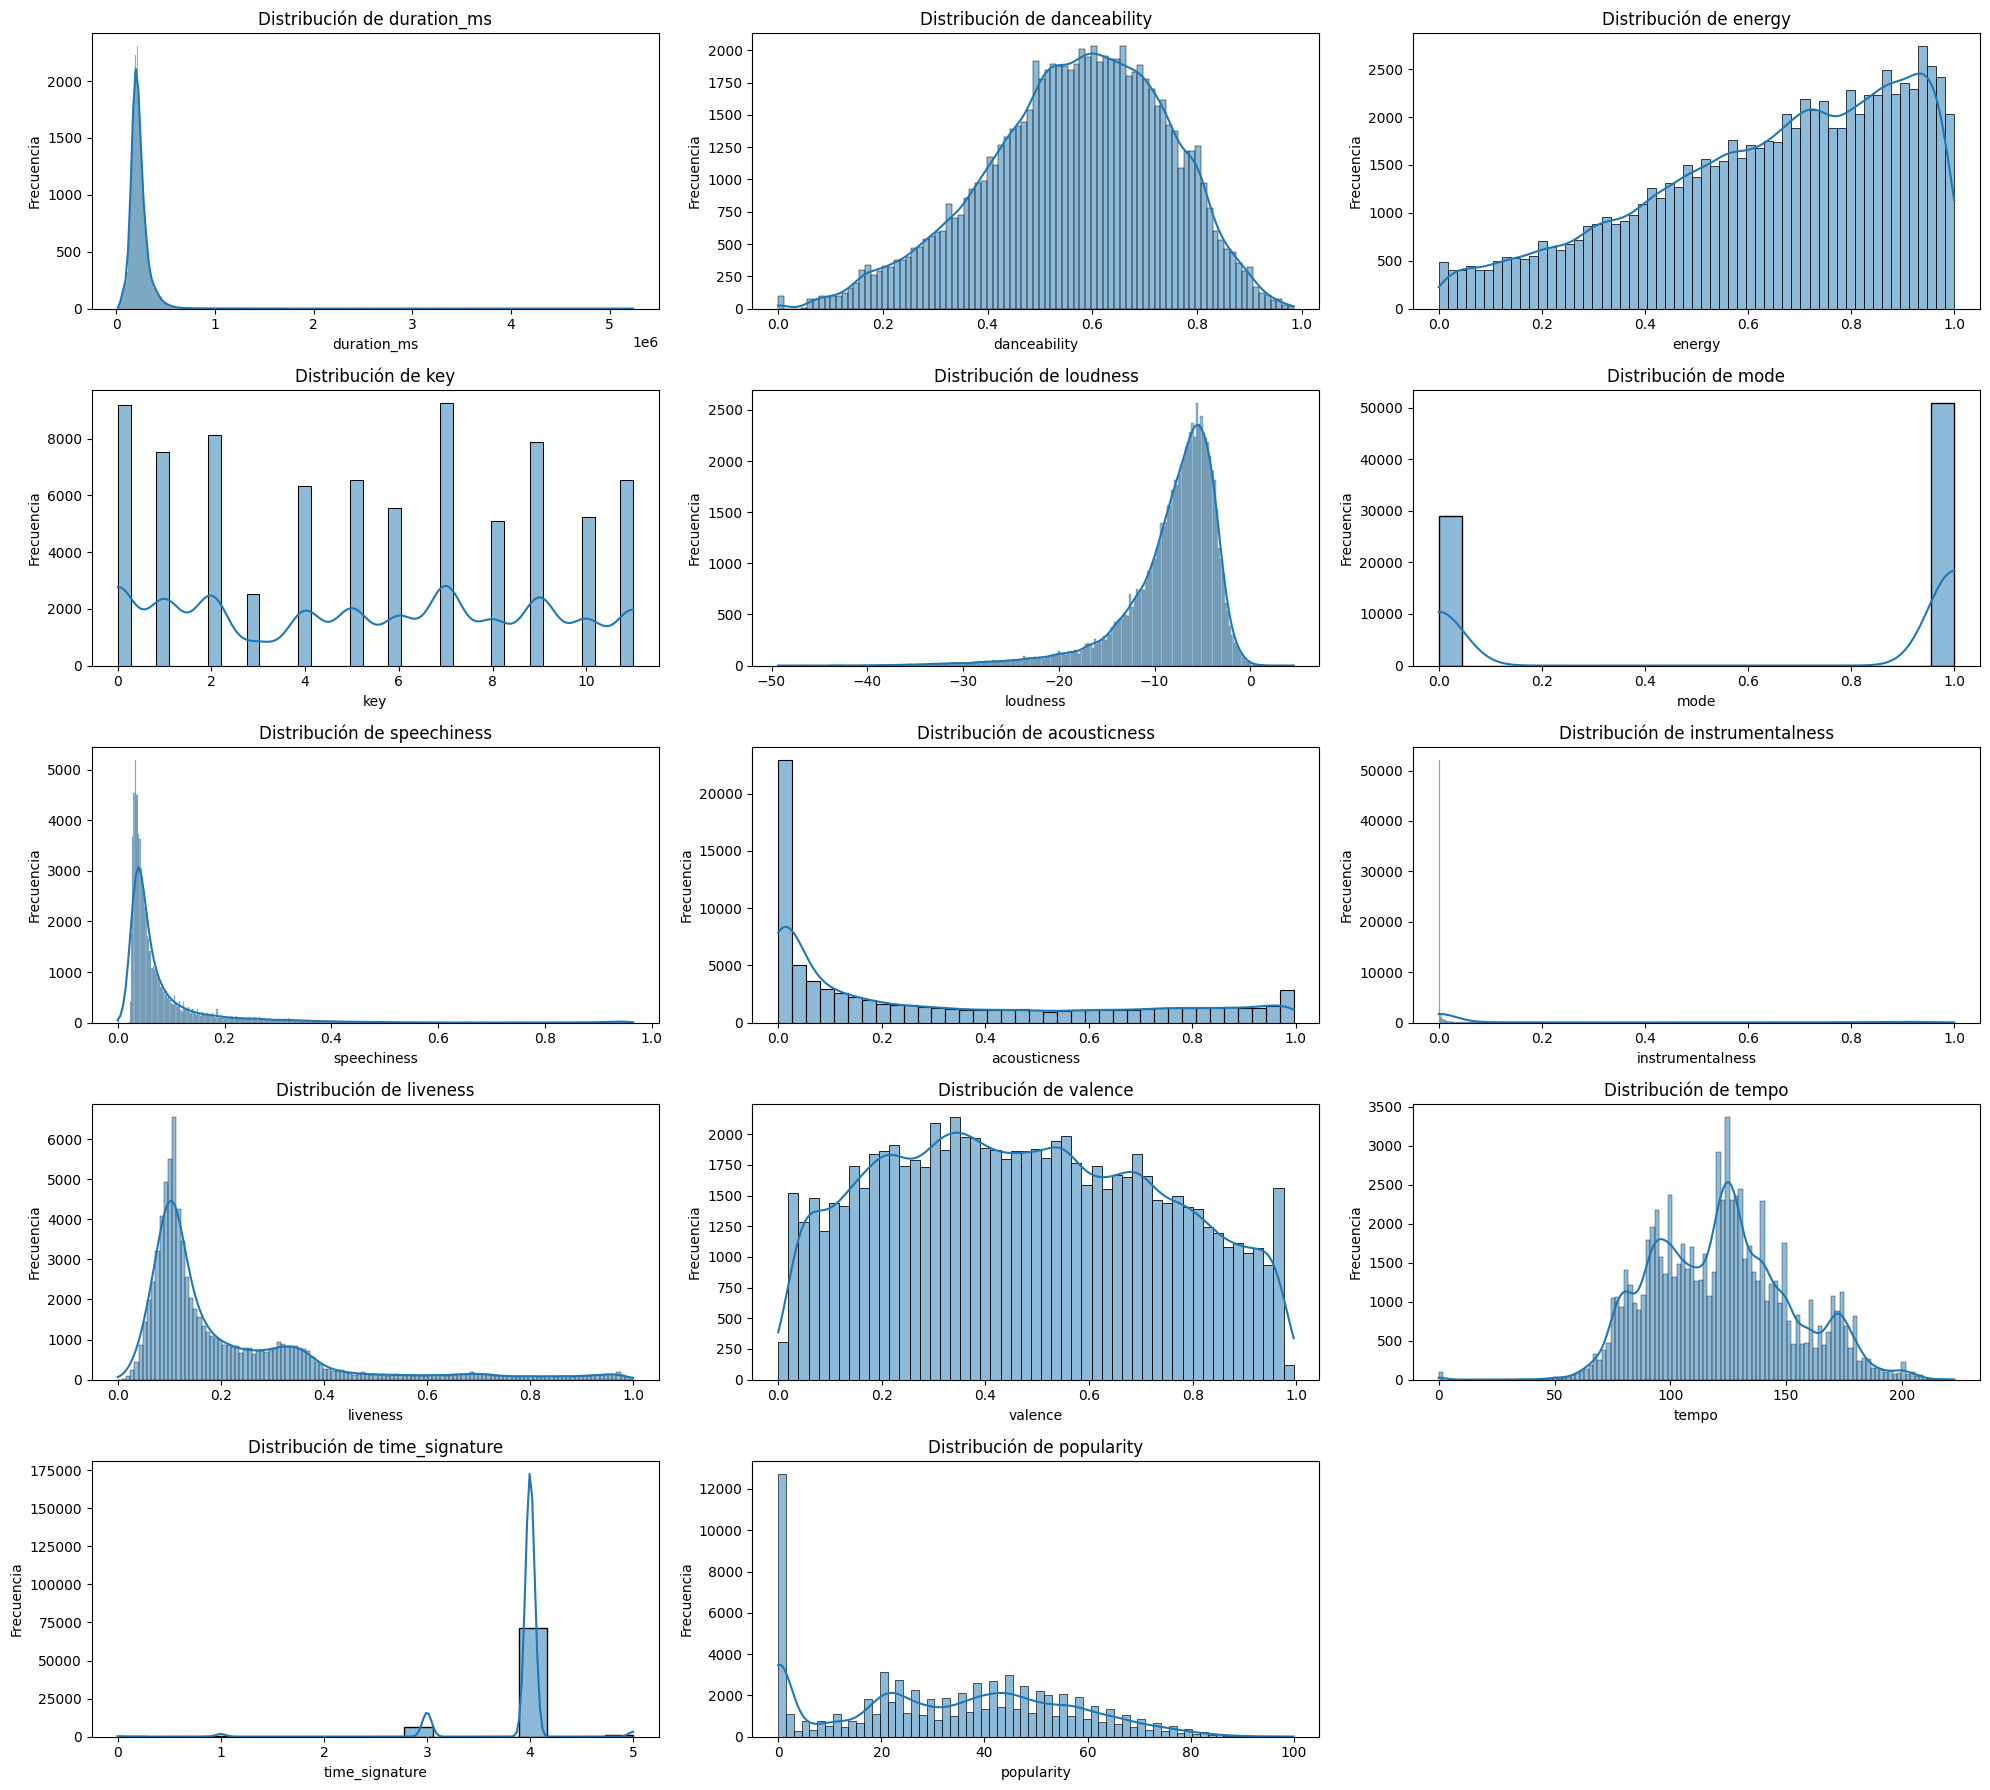

In [ ]:
# Lista de variables numéricas
numerical_columns = variables_numericas

# Crear subgráficos para las variables numéricas
plt.figure(figsize=(20, 18))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 3, i)  # 5 filas y 3 columnas
    sns.histplot(dataTraining[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


**Analisis**

* duration_ms: Su distribución es  sesgada hacia la derecha, ya que la duración de las canciones generalmente oscila entre un rango pequeño (de unos pocos minutos).


* danceability: Valores entre 0 y 1, con una concentración en el rango medio (0.5-0.7).

* energy: con valores entre 0 y 1. Esta distribuido de forma lineal con un pequeño sesgo a la izquierda, valores concentrados entre 0.8 y 1

* key: Valores enteros que representan diferentes tonos musicales, de 0 a 11.Dsitribucion dispareja con tonalidades mas comunes.

* loudness: Generalmente negativa, ya que se mide en decibelios y las canciones suelen tener una sonoridad entre -60 dB y 0 dB, sesgo a la izquierda con mayor concentracion entre -10 y 0.

* mode: Esta variable es binaria, con valores 0 (menor) y 1 (mayor). Mayor representacion del valor 1.

* speechiness: Valores entre 0 y 1. Sesgo a la derecha mayor concentracion entre 0 y 0.1.

* acousticness: Valores entre 0 y 1. sesgo a la dercha con concentracion en 0.

* instrumentalness: Valores entre 0 y 1. sesgo a la derecha con concentracion un poco a los valores cercanos a 0.

* liveness: Valores entre 0 y 1. Sesgo a la derecha concentracion de valores entre 0 y 0.2

* valence: Valores entre 0 y 1. No existe sesgo. Distribucion uniforme

* tempo: Un poco de sesgo a la izquierda pero es una distribucion trimodal

* time_signature: Sesgo a la izquierda, no es uniforme, bimodal con concentracion en 3 y en 4.

* popularity: Valores entre 0 y 100, sesgo a la derecha concentracion valores cercanos a 0.

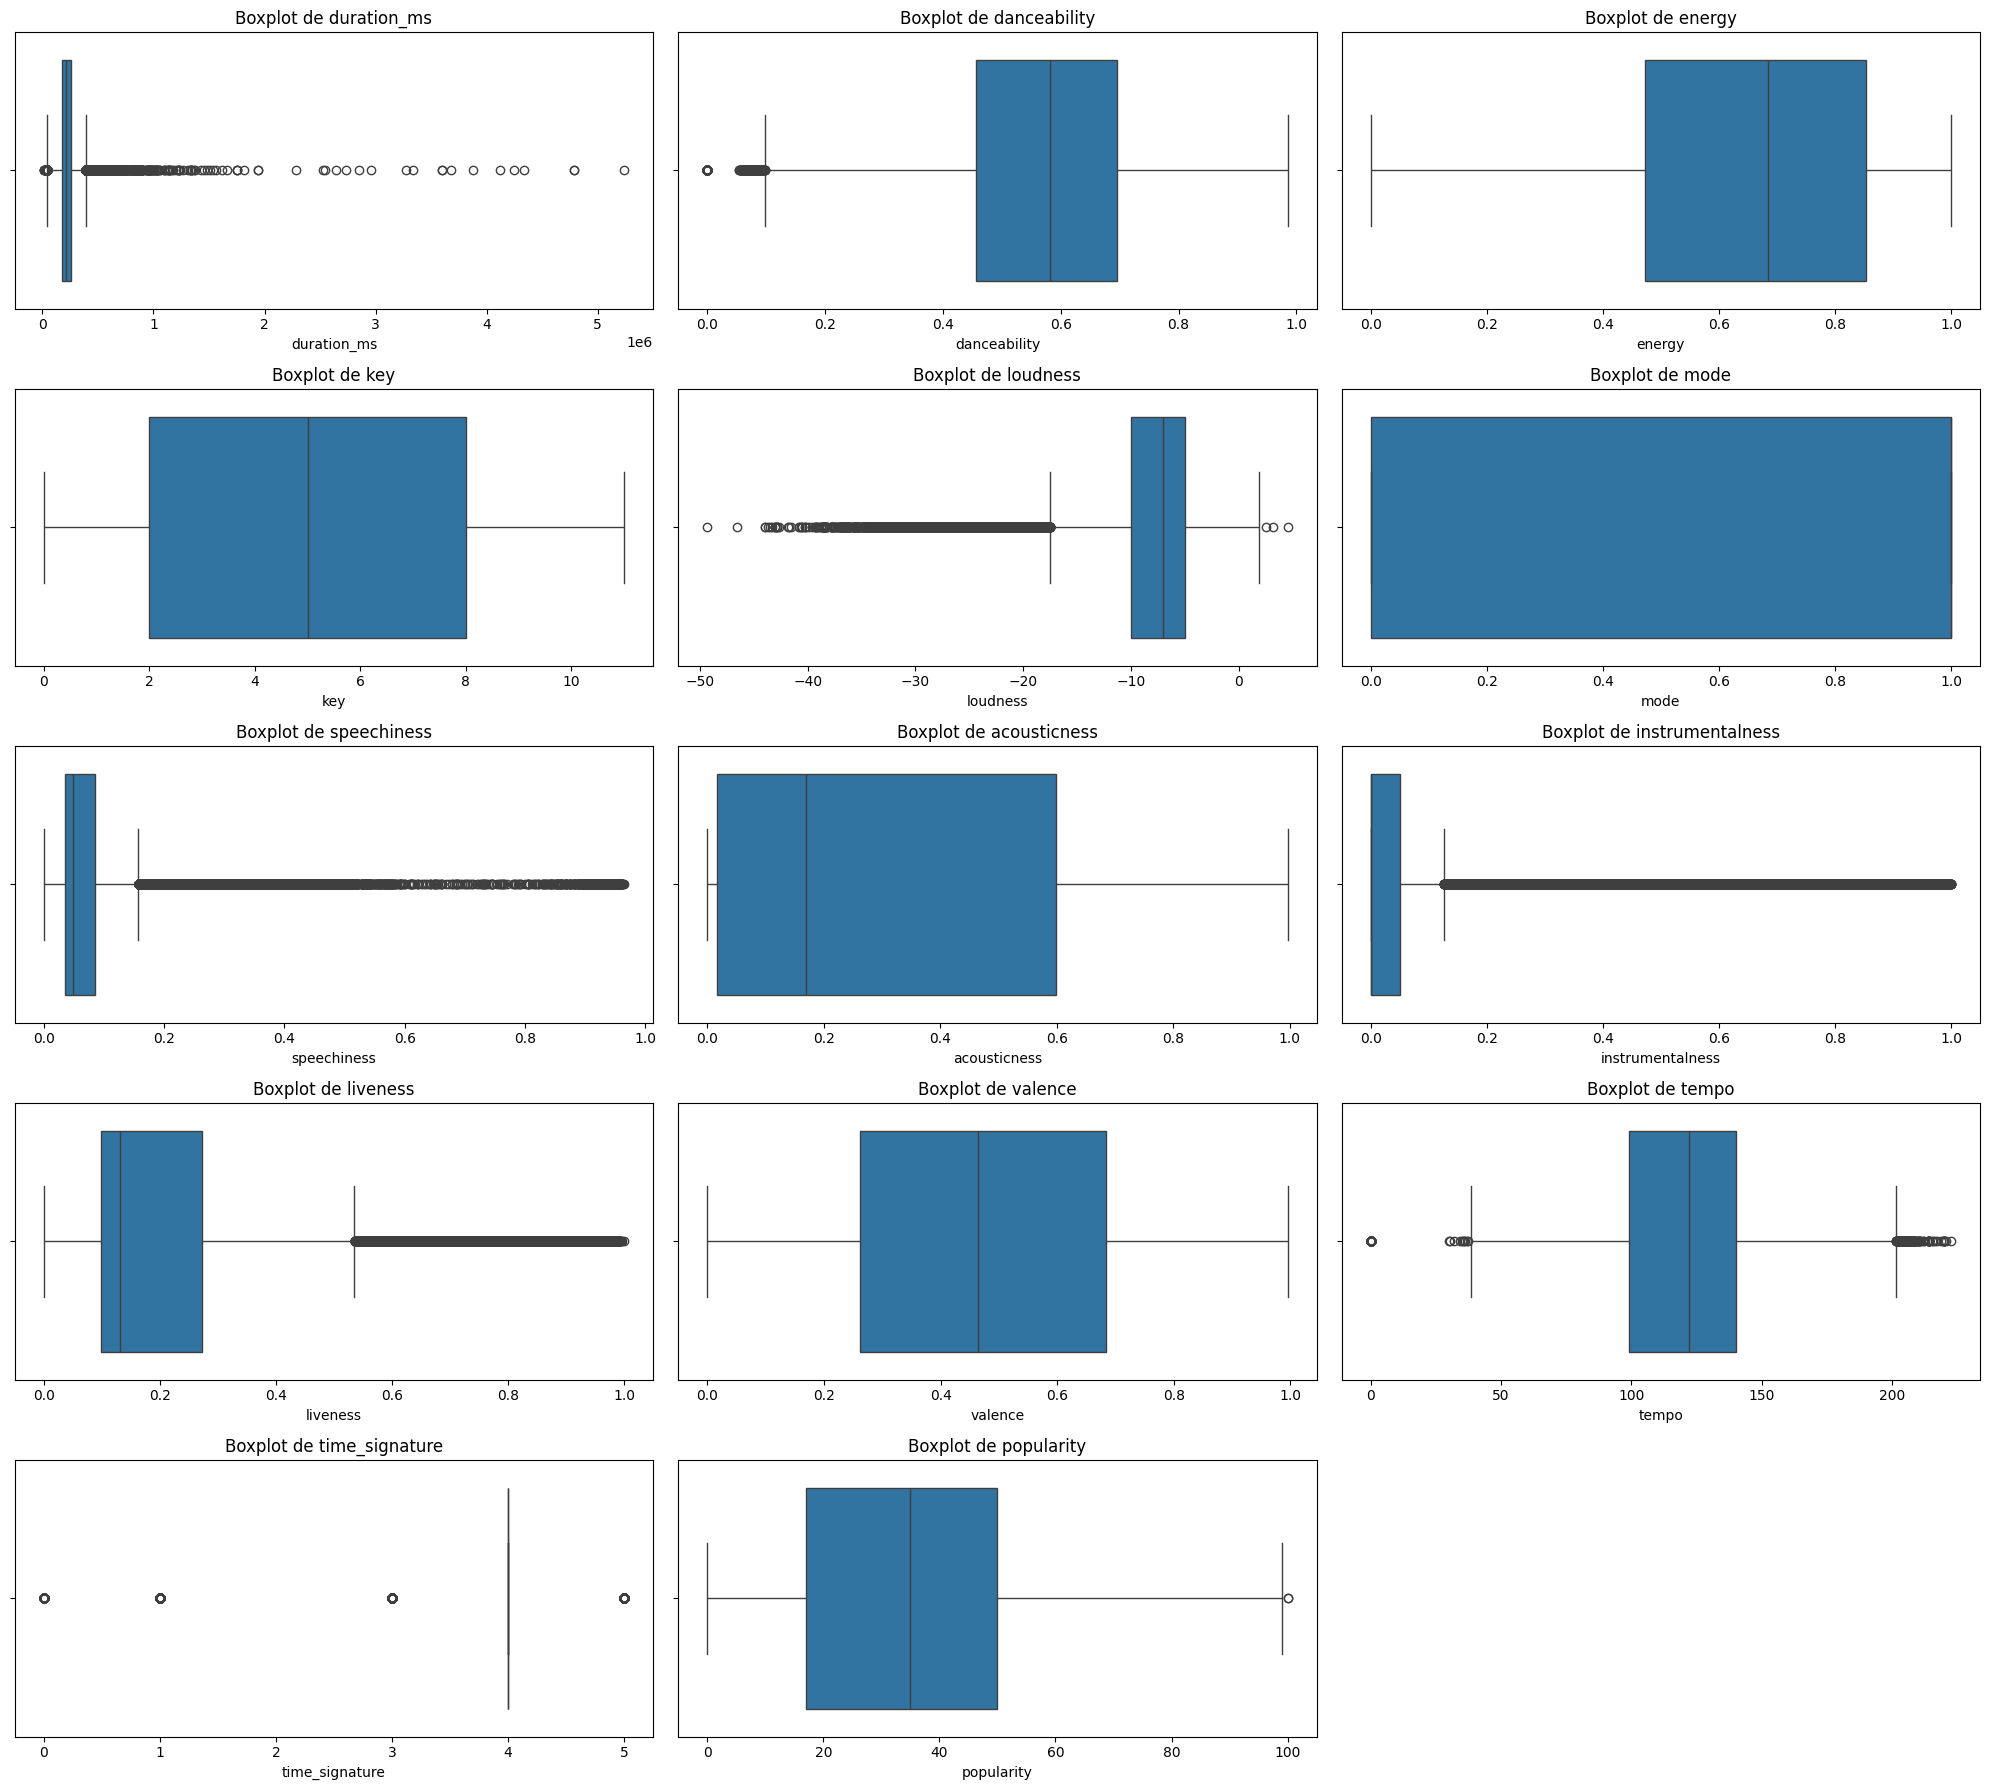

In [ ]:
# Crear Boxplots para revisar outliers
plt.figure(figsize=(20, 18))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 3, i)  # 5 filas y 3 columnas
    sns.boxplot(x=dataTraining[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

**Analisis**

Existe presencia de outliers en duration_ms, danceability, loudness, speechiness, instrumentalness, liveness, tempo y time_signature.

Como se desarrollaran modelos basados en arboles de decision entonces los outliers no se eliminaran ni imputaran debido a que son datos que no afectan a los modelos de este tipo

#### Distribucion de variables categoricas


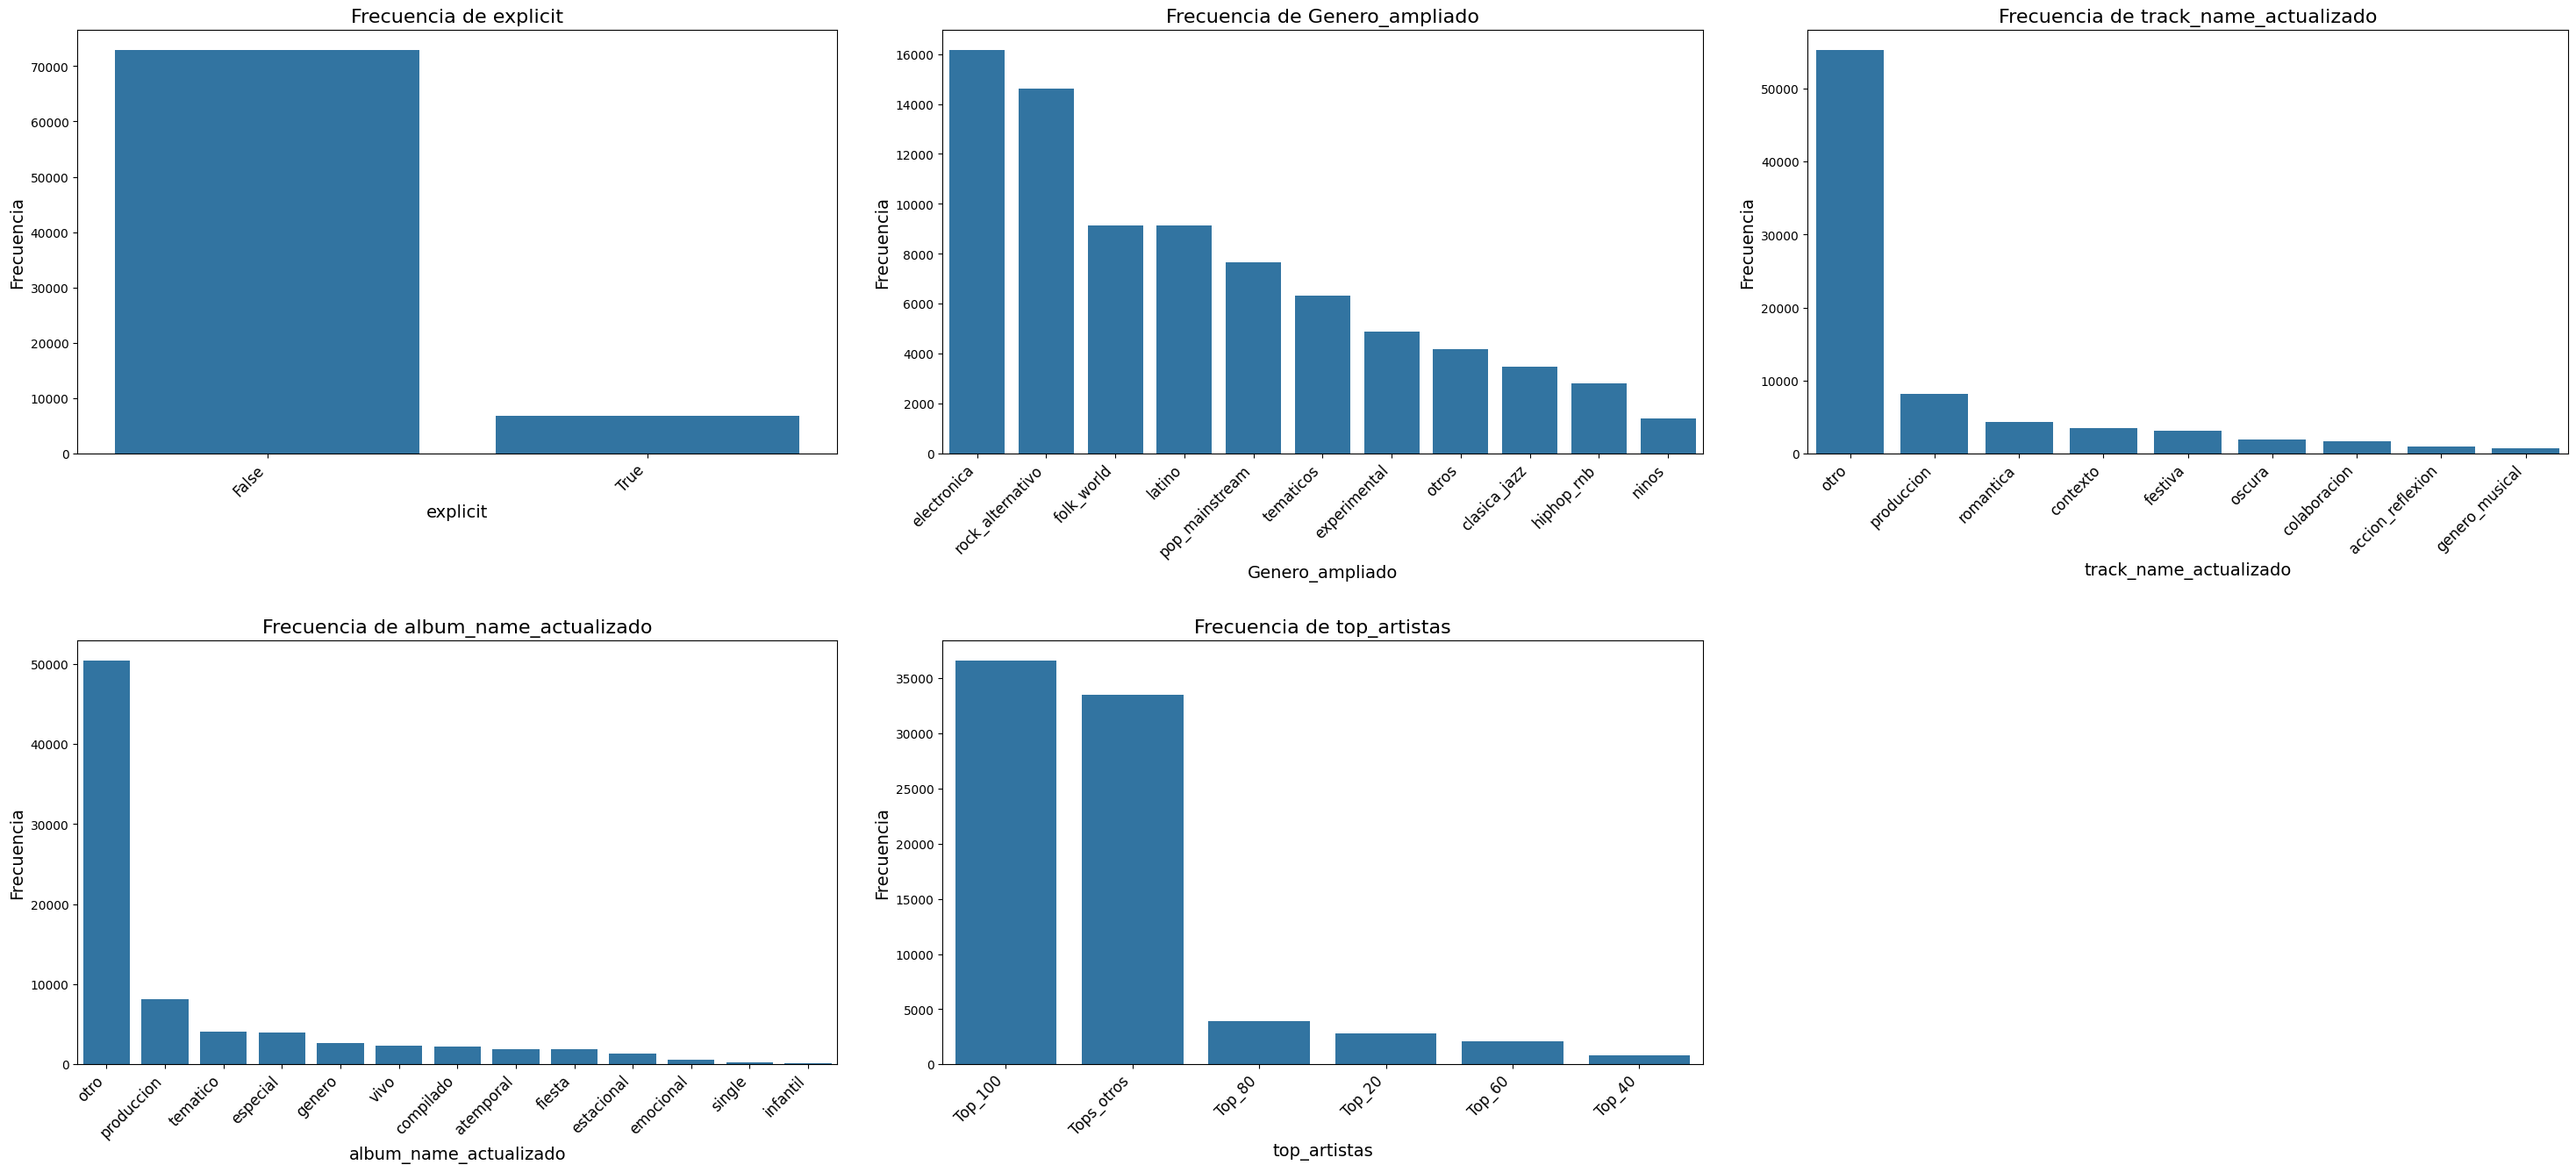

In [ ]:
# Lista de variables categóricas importantes a analizar
categorical_columns = variables_categoricas

# Calcular tamaño de la grilla
n = len(categorical_columns)
cols = 3  # número de columnas por fila
rows = math.ceil(n / cols)  # calcula cuántas filas necesitas

# Crear figura y ejes con un tamaño más grande
fig, axes = plt.subplots(rows, cols, figsize=(10 * cols, 7 * rows))  # Aumentar el tamaño de la figura
axes = axes.flatten()  # aplanar en caso de que haya solo una fila

# Crear gráficos de histogramas de frecuencia
for i, col in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(data=dataTraining, x=col, ax=ax, order=dataTraining[col].value_counts().index)

    # Ajustar el título y etiquetas
    ax.set_title(f'Frecuencia de {col}', fontsize=16)
    ax.set_xlabel(col, fontsize=14)
    ax.set_ylabel('Frecuencia', fontsize=14)

    # Rotar las etiquetas del eje X para que no se solapen
    ax.tick_params(axis='x', rotation=45, labelsize=12)

    # Mejorar el espaciado de las etiquetas
    for label in ax.get_xticklabels():
        label.set_rotation(45)  # Rotar las etiquetas 45 grados
        label.set_horizontalalignment('right')  # Alinear las etiquetas a la derecha

# Eliminar subgráficos sobrantes si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3.0)  # Ajustar el espaciado entre las subgráficas
plt.show()

**Analisis**

* explicit: Mayor concentracion de la categoria False

* genero_ampliado: Se muestran las 11 categorias y se observa que el genero mas representativo de la base es la electronica

* track name actualizado: se muestran las 9 categorias y la mas representativas esta en otros

* name actualizado: de las 13 categorias la que es otros es la mas representativa

* top artistas: de las 6 categorias los artistas que mas se encuentran son aquellos que tienen mas de 100 canciones en el df

#### Conversion de variables categoricas a dummies

En la conversion de variables categoricas a dummies se incorpora el paso de dejarlas en binario, esto debido a que es mejor porque asegura compatibilidad con la mayoría de modelos estadísticos y de machine learning, que requieren variables numéricas. Además, evita que el modelo interprete relaciones de orden o magnitud que no existen entre las categorías. Usar 0 y 1 mantiene la neutralidad de las categorías y evita sesgos en los cálculos.

In [ ]:
# Lista de variables categóricas que quieres convertir en dummies
categorical_columns = variables_categoricas

# Convertir las columnas categóricas a variables dummy y asignarlas al df original
dataTraining = pd.get_dummies(dataTraining, columns=categorical_columns, drop_first=True)
dataTesting = pd.get_dummies(dataTesting, columns=categorical_columns, drop_first=True)

# Convertir las variables booleanas a binarias (0 o 1)
boolean_columns = dataTraining.select_dtypes(include='bool').columns
dataTraining[boolean_columns] = dataTraining[boolean_columns].astype(int)

boolean_columns = dataTesting.select_dtypes(include='bool').columns
dataTesting[boolean_columns] = dataTesting[boolean_columns].astype(int)

In [ ]:
# Verificar los cambios mostrando las primeras filas
dataTraining.columns

Index(['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'popularity', 'explicit_True',
       'Genero_ampliado_electronica', 'Genero_ampliado_experimental',
       'Genero_ampliado_folk_world', 'Genero_ampliado_hiphop_rnb',
       'Genero_ampliado_latino', 'Genero_ampliado_ninos',
       'Genero_ampliado_otros', 'Genero_ampliado_pop_mainstream',
       'Genero_ampliado_rock_alternativo', 'Genero_ampliado_tematicos',
       'track_name_actualizado_colaboracion',
       'track_name_actualizado_contexto', 'track_name_actualizado_festiva',
       'track_name_actualizado_genero_musical',
       'track_name_actualizado_oscura', 'track_name_actualizado_otro',
       'track_name_actualizado_produccion', 'track_name_actualizado_romantica',
       'album_name_actualizado_compilado', 'album_name_actualizado_emocional',
       'album_name_actualizado_especial', 'alb

#### Relacion entre variables

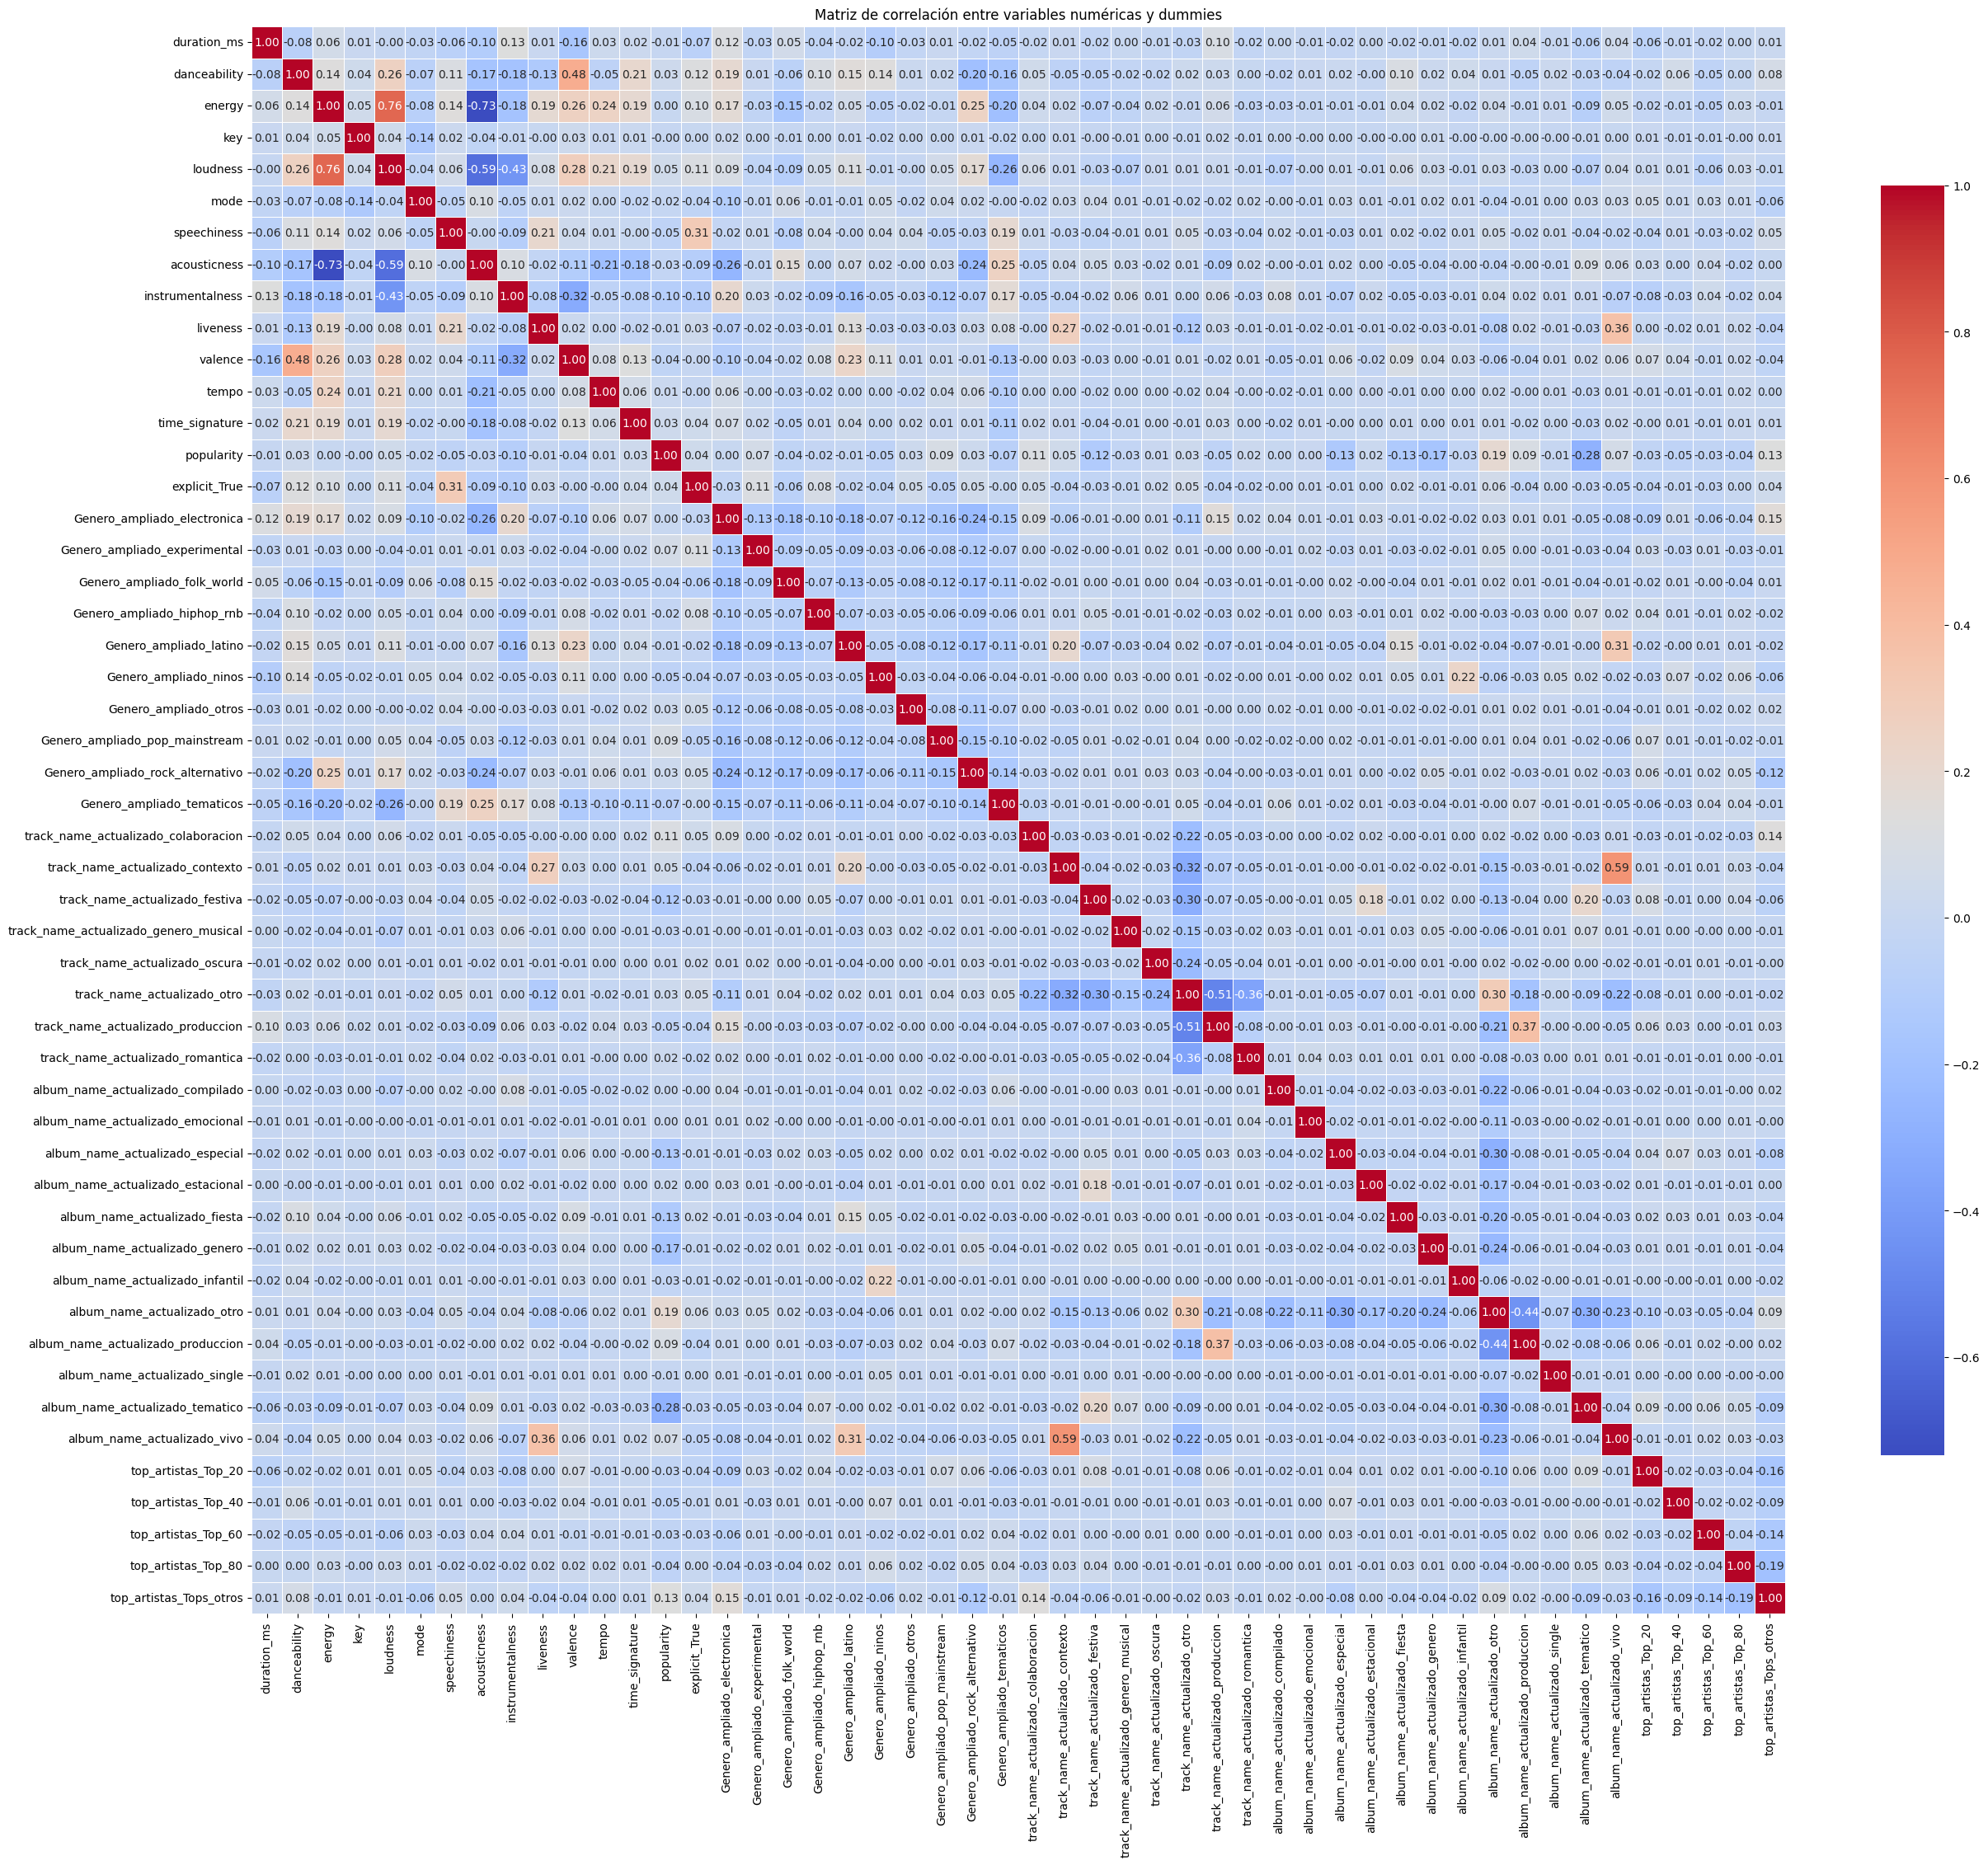

In [ ]:
# COPIA el dataframe original para no modificarlo directamente
df_corr = dataTraining.copy()

# 1. Convertir columnas booleanas a enteros (0 y 1)
bool_cols = df_corr.select_dtypes(include='bool').columns
df_corr[bool_cols] = df_corr[bool_cols].astype(int)

# 2. Calcular la matriz de correlación
correlation_matrix = df_corr.corr()

# 3. Visualizar la matriz de correlación
plt.figure(figsize=(30, 25))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar_kws={'shrink': 0.8})

# Título y etiquetas
plt.title("Matriz de correlación entre variables numéricas y dummies")
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X para mejor legibilidad
plt.yticks(rotation=0)   # Mantener las etiquetas del eje Y sin rotar
plt.show()


**Analisis**

* **Correlaciones fuertes:**
1. Loudness y Energy (0.76): Existe una correlación fuerte y positiva entre la "loudness" y "energy". Esto tiene sentido, ya que los tracks más ruidosos tienden a ser más energéticos.

2. Acousticness y energy (-0.73): Hay una fuerte correlación negativa entre "acousticness" (acústico) y "energy". Esto podría indicar que los tracks más acústicos tienden a ser menos instrumentales.

* Estas correlaciones fuertes se evaluan eliminarlas para evitar la colinealidad



### Pre-Procesamiento de los datos

##### Eliminar variables correlacionadas

Las variables altamente correlacionadas deben eliminarse porque aportan información redundante que puede causar multicolinealidad, afectando la estabilidad e interpretación de los coeficientes en modelos como la regresión. Además, aumentan el riesgo de sobreajuste al repetir patrones similares, lo que reduce la capacidad de generalización del modelo. Se suele usar un umbral de 0.8 porque a partir de ese nivel la correlación se considera fuerte, lo que indica que ambas variables están proporcionando casi la misma información.

In [ ]:
# 1. Crear un conjunto para guardar las columnas a eliminar
cols_to_drop = set()

# 2. Iterar por cada par de columnas con alta correlación
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            colname_to_drop = correlation_matrix.columns[j]
            # Marcar la columna con menor correlación para eliminar
            if colname not in cols_to_drop and colname_to_drop not in cols_to_drop:
                # Aquí puedes decidir qué columna eliminar, en este caso, la columna con menor correlación.
                cols_to_drop.add(colname_to_drop)

# 3. Eliminar las columnas con alta correlación
dataTraining = dataTraining.drop(columns=cols_to_drop, errors='ignore')
dataTesting = dataTesting.drop(columns=cols_to_drop, errors='ignore')

# Mostrar las columnas eliminadas
print(f"Se eliminaron las siguientes columnas con alta correlación: {cols_to_drop}")


Se eliminaron las siguientes columnas con alta correlación: set()


**Analisis**

Debido a que ninguna variable supera el 0.8 en correlacion ninguna columna se elimina

##### Realizar la prueba VIF

Eliminar columnas usando la prueba VIF (Variance Inflation Factor) es importante porque permite identificar y reducir la multicolinealidad entre variables independientes. Un VIF alto indica que una variable está altamente correlacionada con otras del modelo, lo que puede distorsionar los coeficientes, inflar los errores estándar y dificultar la interpretación de los resultados. Al eliminar las variables con VIF elevado, se mejora la estabilidad del modelo, se reduce la redundancia y se obtiene una representación más clara y precisa de las relaciones entre las variables.

In [ ]:
#Prueba VIF

# 1. Copiar el dataframe limpio para evitar modificar el original
df_vif = dataTraining.copy()

# 2. Convertir booleanos a enteros
bool_cols = df_vif.select_dtypes(include='bool').columns
df_vif[bool_cols] = df_vif[bool_cols].astype(int)

# 3. Seleccionar solo las variables independientes (excluyendo el target y energy que por decision de experto se desea tener en el modelo)
X = df_vif.drop(columns=['popularity','energy'])

# 4. Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 5. Ordenar y mostrar
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
print(vif_data)


                                 Variable        VIF
0                          time_signature  64.446651
1             track_name_actualizado_otro  43.052991
2             album_name_actualizado_otro  24.124428
3                            danceability  19.911948
4                                   tempo  17.916113
5                                loudness   7.601408
6       track_name_actualizado_produccion   7.479761
7                                 valence   6.781745
8             Genero_ampliado_electronica   6.692406
9                             duration_ms   6.129112
10       Genero_ampliado_rock_alternativo   5.719735
11      album_name_actualizado_produccion   4.876451
12        track_name_actualizado_contexto   4.244230
13                 Genero_ampliado_latino   4.229193
14       track_name_actualizado_romantica   4.205276
15             Genero_ampliado_folk_world   3.743702
16                           acousticness   3.627905
17         Genero_ampliado_pop_mainstream   3.

In [ ]:
# Filtrar las variables con VIF mayor a 10
variables_altamente_correlacionadas = vif_data[vif_data["VIF"] > 10]["Variable"].tolist()

# Eliminar esas variables del dataframe original
dataTraining = dataTraining.drop(columns=variables_altamente_correlacionadas, errors='ignore')
dataTesting = dataTesting.drop(columns=variables_altamente_correlacionadas, errors='ignore')

# Mostrar las variables eliminadas
print("Variables eliminadas por VIF > 10:")
print(variables_altamente_correlacionadas)

Variables eliminadas por VIF > 10:
['time_signature', 'track_name_actualizado_otro', 'album_name_actualizado_otro', 'danceability', 'tempo']


**Analisis**

Estas varaibles fueron eliminadas por alta multicolinealidad detectada mediante el Variance Inflation Factor (VIF).

Esto indica que estas variables estaban fuertemente correlacionadas con otras dentro del modelo, lo cual puede distorsionar las estimaciones de los coeficientes, inflar errores estándar y afectar la interpretación del modelo. Al eliminarlas, se busca mejorar la estabilidad, interpretabilidad y generalización del modelo sin perder información relevante (ya que su efecto puede estar representado por otras variables menos correlacionadas).

##### Seleccion de variables RFE

* Hacer RFE (Eliminación Recursiva de Características) es útil porque permite seleccionar automáticamente las variables más relevantes para un modelo predictivo, eliminando de forma iterativa las menos importantes según su impacto en el rendimiento. Esto ayuda a reducir la complejidad del modelo, mejora su interpretabilidad, puede aumentar la precisión y disminuye el riesgo de sobreajuste, especialmente cuando se trabaja con conjuntos de datos que contienen muchas variables.

* Se van a seleccionar variables a partir de la medicion REF con Cross Validation, estos modelos se ajustan a regresion debido a que nuestra variable target es continua

* Se extrae una muestra aleatoria de la base de datos para poder evaluar de manera mas eficiente cuales son las mejores varaibles a tener en cuenta por cada modelo

* Usar modelos como Gradient Boosting, XGBoost y Random Forest es útil porque son algoritmos de ensamblado que combinan múltiples árboles de decisión para lograr un alto rendimiento predictivo, incluso con datos complejos o no lineales. Estos modelos capturan mejor las relaciones entre variables, manejan bien datos con valores perdidos o variables irrelevantes, y suelen ofrecer buenos resultados sin necesidad de mucha preparación de los datos. Además, son robustos frente al sobreajuste (especialmente Random Forest) y permiten interpretar la importancia de las variables en la predicción.

In [ ]:
# Variable dependiente (target)
y_train_pd_2 = dataTraining["popularity"]

# Variables independientes (features)
X_train_pd_6 = dataTraining.drop(columns=["popularity"])

# Variables independientes (features)
#X_test_pd_6 = dataTesting.drop(columns=["popularity"])

In [ ]:
# Extraer el 30% aleatorio de los datos de entrenamiento
X_sample = X_train_pd_6.sample(frac=0.3, random_state=42)
y_sample = y_train_pd_2.loc[X_sample.index]

###### Gradient Boosting

In [ ]:
#Paso 1: Modelo base
gbr_model = GradientBoostingRegressor(random_state=6032025)

# Paso 2: Scoring personalizado (MSE negativo)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Paso 3: Validación cruzada
cv = KFold(n_splits=2, shuffle=True, random_state=42)

# Paso 4: RFECV para selección automática
selector_gbr = RFECV(estimator=gbr_model, step=1, cv=cv, scoring=mse_scorer)
selector_gbr.fit(X_sample, y_sample)
#selector.fit(X_train_pd_6, y_train_pd_2)

# Paso 5: Transformar conjuntos de datos
X_train_rfe_gbr = selector_gbr.transform(X_train_pd_6)
#X_test_rfe_gbr = selector.transform(X_test_pd_6)#


###### XGboost

In [ ]:
# Paso 1: Modelo base de regresión
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=6032025)

# Paso 2: Métrica de scoring -> minimizar el MSE (negativo para sklearn)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Paso 3: Validación cruzada
cv = KFold(n_splits=2, shuffle=True, random_state=42)

# Paso 4: RFECV para seleccionar automáticamente el número óptimo de variables
selector_xgb = RFECV(estimator=xgb_model, step=1, cv=cv, scoring=mse_scorer)
selector_xgb.fit(X_sample, y_sample)

# Paso 5: Transformar el conjunto de entrenamiento y prueba
X_train_rfe_xgb = selector_xgb.transform(X_train_pd_6)
#X_test_rfe_xgb = selector.transform(X_test_pd_6)

###### Random Forest

In [ ]:
# Paso 1: Modelo base
rf_model = RandomForestRegressor(random_state=6032025)

# Paso 2: Definir métrica (MSE negativo)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Paso 3: Validación cruzada
cv = KFold(n_splits=2, shuffle=True, random_state=42)

# Paso 4: RFECV para seleccionar automáticamente las variables que minimizan el MSE
selector_rf = RFECV(estimator=rf_model, step=1, cv=cv, scoring=mse_scorer)
selector_rf.fit(X_sample, y_sample)

# Paso 5: Transformar los conjuntos de entrenamiento y prueba
X_train_rfe_rf = selector_rf.transform(X_train_pd_6)
#X_test_rfe_rf = selector.transform(X_test_pd_6)

###### Resultados Obtenidos

In [ ]:
# Obtener columnas seleccionadas por cada modelo
columnas_gbr = X_train_pd_6.columns[selector_gbr.support_].tolist()
columnas_xgb = X_train_pd_6.columns[selector_xgb.support_].tolist()
columnas_rf  = X_train_pd_6.columns[selector_rf.support_].tolist()

# Convertir a conjuntos para facilitar comparación
set_gbr = set(columnas_gbr)
set_xgb = set(columnas_xgb)
set_rf  = set(columnas_rf)

# Columnas comunes
comunes_todos = set_gbr & set_xgb & set_rf
solo_gbr = set_gbr - set_xgb - set_rf
solo_xgb = set_xgb - set_gbr - set_rf
solo_rf  = set_rf - set_gbr - set_xgb

# Mostrar resultados
print("Columnas comunes en los tres modelos:\n", comunes_todos)
print("\nSolo GBR:\n", solo_gbr)
print("\nSolo XGB:\n", solo_xgb)
print("\nSolo RF:\n", solo_rf)


Columnas comunes en los tres modelos:
 {'album_name_actualizado_emocional', 'instrumentalness', 'duration_ms', 'loudness', 'Genero_ampliado_pop_mainstream', 'album_name_actualizado_fiesta', 'Genero_ampliado_otros', 'top_artistas_Tops_otros', 'top_artistas_Top_20', 'liveness', 'album_name_actualizado_estacional', 'Genero_ampliado_rock_alternativo', 'key', 'track_name_actualizado_contexto', 'speechiness', 'Genero_ampliado_ninos', 'track_name_actualizado_colaboracion', 'Genero_ampliado_tematicos', 'top_artistas_Top_40', 'album_name_actualizado_produccion', 'track_name_actualizado_genero_musical', 'valence', 'album_name_actualizado_genero', 'Genero_ampliado_experimental', 'track_name_actualizado_produccion', 'explicit_True', 'Genero_ampliado_electronica', 'top_artistas_Top_80', 'track_name_actualizado_romantica', 'album_name_actualizado_tematico', 'Genero_ampliado_hiphop_rnb', 'energy', 'Genero_ampliado_latino', 'mode', 'Genero_ampliado_folk_world', 'top_artistas_Top_60', 'album_name_actua

**Analisis**

Se puede observar que dentro de los tres modelos que se estan evaluando los 3 indicaron que se debe trabajar las mismas varaibles de aca en adelante, por lo tanto estas son las variables que se tendran en cuenta para la calibracion de los modelos

### Calibracion del Modelo

Vamos a tomar una muestra del dataframe original para calibrar los hiperparametros de cada modelo, se tendran en cuenta solo las variables indicadas en el punto anterior

Utilizamos Optuna y este sirve para calibrar el modelo, es una excelente opción porque permite optimizar automáticamente los hiperparámetros mediante técnicas eficientes como búsqueda bayesiana o TPE (Tree-structured Parzen Estimator). A diferencia de métodos tradicionales como grid search, Optuna es más rápido y flexible, ya que explora de manera inteligente el espacio de búsqueda, enfocándose en las combinaciones más prometedoras. Esto mejora el desempeño del modelo, reduce el tiempo de experimentación y facilita encontrar configuraciones óptimas que maximizan métricas de evaluación como la precisión, el AUC o el F1-score.

In [ ]:
columnas_comunes = [
    'album_name_actualizado_emocional', 'instrumentalness', 'duration_ms', 'loudness',
    'Genero_ampliado_pop_mainstream', 'album_name_actualizado_fiesta', 'Genero_ampliado_otros',
    'top_artistas_Tops_otros', 'liveness', 'album_name_actualizado_estacional',
    'Genero_ampliado_rock_alternativo', 'key', 'track_name_actualizado_contexto', 'speechiness',
    'Genero_ampliado_ninos', 'track_name_actualizado_colaboracion', 'Genero_ampliado_tematicos',
    'top_artistas_Top_40', 'album_name_actualizado_produccion', 'track_name_actualizado_genero_musical',
    'valence', 'album_name_actualizado_genero', 'Genero_ampliado_experimental',
    'track_name_actualizado_produccion', 'explicit_True', 'Genero_ampliado_electronica',
    'top_artistas_Top_80', 'track_name_actualizado_romantica', 'album_name_actualizado_tematico',
    'Genero_ampliado_hiphop_rnb', 'energy', 'Genero_ampliado_latino', 'mode',
    'Genero_ampliado_folk_world', 'top_artistas_Top_60', 'album_name_actualizado_infantil',
    'track_name_actualizado_festiva', 'acousticness', 'album_name_actualizado_especial'
]

dataTraining = dataTraining[columnas_comunes].assign(popularity=dataTraining['popularity'])
dataTesting = dataTesting[columnas_comunes]

In [ ]:
X_sample = dataTraining[columnas_comunes]
y_sample = dataTraining['popularity']

###### Gradient Boosting

In [ ]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_categorical('n_estimators', [100, 200, 300, 400]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.01, 0.05, 0.1, 0.2]),
        'max_depth': trial.suggest_categorical('max_depth', [3, 4, 5, 6]),
        'subsample': trial.suggest_categorical('subsample', [0.6, 0.8, 1.0]),
        'min_samples_split': trial.suggest_categorical('min_samples_split', [2, 5, 10]),
        'min_samples_leaf': trial.suggest_categorical('min_samples_leaf', [1, 3, 5])
    }

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = []

    for train_idx, val_idx in kf.split(X_sample):
        X_train_fold, X_val_fold = X_sample.iloc[train_idx], X_sample.iloc[val_idx]
        y_train_fold, y_val_fold = y_sample.iloc[train_idx], y_sample.iloc[val_idx]

        model = GradientBoostingRegressor(**params, random_state=42)
        model.fit(X_train_fold, y_train_fold)

        preds = model.predict(X_val_fold)
        score = mean_squared_error(y_val_fold, preds)
        scores.append(score)

    return np.mean(scores)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

print("Mejores hiperparámetros encontrados:")
print(study.best_params)


[I 2025-04-22 13:17:11,446] A new study created in memory with name: no-name-0bec9d5f-933e-4efd-a7df-e54370e50941
[I 2025-04-22 13:18:57,823] Trial 0 finished with value: 430.96653715941085 and parameters: {'n_estimators': 100, 'learning_rate': 0.01, 'max_depth': 3, 'subsample': 1.0, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 0 with value: 430.96653715941085.
[I 2025-04-22 13:22:03,635] Trial 1 finished with value: 337.1740341168574 and parameters: {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 4, 'subsample': 0.6, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 1 with value: 337.1740341168574.
[I 2025-04-22 13:25:52,365] Trial 2 finished with value: 381.2529272328661 and parameters: {'n_estimators': 200, 'learning_rate': 0.01, 'max_depth': 5, 'subsample': 0.6, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 1 with value: 337.1740341168574.
[I 2025-04-22 13:28:11,190] Trial 3 finished with value: 326.65870769990835 and paramete

Mejores hiperparámetros encontrados:
{'n_estimators': 400, 'learning_rate': 0.1, 'max_depth': 6, 'subsample': 0.8, 'min_samples_split': 2, 'min_samples_leaf': 1}


Mejores hiperparámetros encontrados:
{'n_estimators': 400, 'learning_rate': 0.1, 'max_depth': 6, 'subsample': 0.8, 'min_samples_split': 2, 'min_samples_leaf': 1}

###### XGboost

In [ ]:
# Definición de la función objective para optimizar los hiperparámetros
def objective(trial):
    params = {
        'n_estimators': trial.suggest_categorical('n_estimators', [100, 200, 300, 400]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.01, 0.05, 0.1, 0.2]),
        'max_depth': trial.suggest_categorical('max_depth', [3, 4, 5, 6]),
        'subsample': trial.suggest_categorical('subsample', [0.6, 0.8, 1.0]),
        'min_child_weight': trial.suggest_categorical('min_child_weight', [1, 3, 5]),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.6, 0.8, 1.0]),
        'gamma': trial.suggest_categorical('gamma', [0, 1, 5, 10]),
        'reg_alpha': trial.suggest_categorical('reg_alpha', [0, 0.01, 0.1, 1])
    }

    # KFold para validación cruzada
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = []

    # Entrenamiento y validación en cada fold
    for train_idx, val_idx in kf.split(X_sample):
        X_train_fold, X_val_fold = X_sample.iloc[train_idx], X_sample.iloc[val_idx]
        y_train_fold, y_val_fold = y_sample.iloc[train_idx], y_sample.iloc[val_idx]

        # Crear el modelo XGBoost con los parámetros sugeridos
        model = XGBRegressor(**params, random_state=42)
        model.fit(X_train_fold, y_train_fold)

        # Hacer las predicciones y calcular el MSE
        preds = model.predict(X_val_fold)
        score = mean_squared_error(y_val_fold, preds)
        scores.append(score)

    # Devolver el MSE promedio
    return np.mean(scores)

# Crear el estudio Optuna y optimizar la función objective
study = optuna.create_study(direction='minimize')  # Minimizar el MSE
study.optimize(objective, n_trials=30)  # Optimizar con 30 pruebas

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(study.best_params)

[I 2025-04-22 17:20:27,073] A new study created in memory with name: no-name-518a20d1-25bc-4b2a-ba22-2af8cc51e19a
[I 2025-04-22 17:20:41,000] Trial 0 finished with value: 314.821630859375 and parameters: {'n_estimators': 300, 'learning_rate': 0.05, 'max_depth': 5, 'subsample': 0.8, 'min_child_weight': 1, 'colsample_bytree': 0.8, 'gamma': 10, 'reg_alpha': 0.01}. Best is trial 0 with value: 314.821630859375.
[I 2025-04-22 17:20:59,138] Trial 1 finished with value: 355.69298095703124 and parameters: {'n_estimators': 400, 'learning_rate': 0.01, 'max_depth': 5, 'subsample': 0.6, 'min_child_weight': 5, 'colsample_bytree': 0.6, 'gamma': 0, 'reg_alpha': 0.1}. Best is trial 0 with value: 314.821630859375.
[I 2025-04-22 17:21:10,834] Trial 2 finished with value: 314.02235717773436 and parameters: {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 6, 'subsample': 0.8, 'min_child_weight': 1, 'colsample_bytree': 0.6, 'gamma': 0, 'reg_alpha': 0.1}. Best is trial 2 with value: 314.022357177734

Mejores hiperparámetros encontrados:
{'n_estimators': 400, 'learning_rate': 0.2, 'max_depth': 6, 'subsample': 1.0, 'min_child_weight': 1, 'colsample_bytree': 1.0, 'gamma': 1, 'reg_alpha': 1}


Mejores hiperparámetros encontrados:
{'n_estimators': 400, 'learning_rate': 0.2, 'max_depth': 6, 'subsample': 1.0, 'min_child_weight': 1, 'colsample_bytree': 1.0, 'gamma': 1, 'reg_alpha': 1}

###### Random Forest

In [ ]:
# Definición de la función objective para optimizar los hiperparámetros
def objective(trial):
    params = {
        'n_estimators': trial.suggest_categorical('n_estimators', [100, 200, 300, 400]),
        'max_depth': trial.suggest_categorical('max_depth', [3, 5, 7, 10, None]),  # None es válido para RandomForest
        'min_samples_split': trial.suggest_categorical('min_samples_split', [2, 5, 10]),
        'min_samples_leaf': trial.suggest_categorical('min_samples_leaf', [1, 2, 4]),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
    }

    # KFold para validación cruzada
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = []

    # Entrenamiento y validación en cada fold
    for train_idx, val_idx in kf.split(X_sample):
        X_train_fold, X_val_fold = X_sample.iloc[train_idx], X_sample.iloc[val_idx]
        y_train_fold, y_val_fold = y_sample.iloc[train_idx], y_sample.iloc[val_idx]

        # Crear el modelo RandomForestRegressor con los parámetros sugeridos
        model = RandomForestRegressor(**params, random_state=42)
        model.fit(X_train_fold, y_train_fold)

        # Hacer las predicciones y calcular el MSE
        preds = model.predict(X_val_fold)
        score = mean_squared_error(y_val_fold, preds)
        scores.append(score)

    # Devolver el MSE promedio
    return np.mean(scores)

# Crear el estudio Optuna y optimizar la función objective
study = optuna.create_study(direction='minimize')  # Minimizar el MSE
study.optimize(objective, n_trials=30)  # Optimizar con 30 pruebas

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(study.best_params)



[I 2025-04-22 17:36:04,309] A new study created in memory with name: no-name-5a2fa04d-f6ad-4d8f-828c-e755b33ec0d8
[I 2025-04-22 17:36:43,105] Trial 0 finished with value: 364.16948221278545 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 364.16948221278545.
[I 2025-04-22 17:38:24,581] Trial 1 finished with value: 363.17533743023836 and parameters: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 363.17533743023836.
[I 2025-04-22 17:38:49,824] Trial 2 finished with value: 441.8022744556644 and parameters: {'n_estimators': 200, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 1 with value: 363.17533743023836.
[I 2025-04-22 17:39:11,424] Trial 3 finished with value: 443.6318018608573 

Mejores hiperparámetros encontrados:
{'n_estimators': 300, 'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True}


Mejores hiperparámetros encontrados:
{'n_estimators': 300, 'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True}

**Analisis**

Se observa que debido a Optuna pudimos detallar de manera eficiente cuales son los mejores hiperparametros por modelo para poder entrenar cada modelo

### Entrenamiento del modelo

Para entrenar el modelo se tienen en cuenta todas las filas del dataframe original, las columnas que seleccionamos debido a la seleccion por correlacion, VIF y RFE y tenemos en cuenta los hiperparametros que se encontraron en la calibracion con optuna

esta base de datos de dataTraining se dividara en train y val para poder ajustar el modelo y luego realizar la medicion de prediccion del modelo por RMSE

In [ ]:
# Selección de variables
X_train_sel = dataTraining[columnas_comunes]
X_test_sel = dataTesting[columnas_comunes]
y_train = dataTraining['popularity']

# División para validación interna (20% para val, 80% para entrenar)
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_sel, y_train, test_size=0.2, random_state=230425)

In [ ]:
X_test_sel.shape

(34200, 39)

In [ ]:
X_train_sel.shape

(79800, 39)

In [ ]:
y_train.shape

(79800,)

###### Gradient Boosting

In [ ]:
# Definición manual de hiperparámetros para Gradient Boosting
parametros_gb = {
    'n_estimators': 400,
    'learning_rate': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'min_samples_split': 2,
    'min_samples_leaf': 1}

# Entrenamiento del modelo
modelo_gb = GradientBoostingRegressor(**parametros_gb)
modelo_gb.fit(X_train_final, y_train_final)

# Evaluación en el conjunto de validación
y_pred_val_gb = modelo_gb.predict(X_val)
mse_gb = mean_squared_error(y_val, y_pred_val_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_val, y_pred_val_gb)

print("Resultados en conjunto de validación del modelo Gradient Boosting:")
print(f"RMSE: {rmse_gb:.4f}")
print(f"R²: {r2_gb:.4f}")

# Predicciones finales sobre la base de test real
y_pred_test_gb = modelo_gb.predict(X_test_sel)

# Mostrar algunas predicciones
print("\nPrimeras predicciones sobre el conjunto de test (Gradient Boosting):")
print(y_pred_test_gb[:10])

Resultados en conjunto de validación del modelo Gradient Boosting:
RMSE: 16.5880
R²: 0.4460

Primeras predicciones sobre el conjunto de test (Gradient Boosting):
[46.07355323 25.18128979 34.27912177  0.07177697 30.87075577 35.92962119
 26.46678356 32.56460612 43.97920293 30.54462916]


###### XGboost

In [ ]:
# Definición manual de hiperparámetros
parametros = {
    'n_estimators': 400,
    'learning_rate': 0.2,
    'max_depth': 6,
    'subsample': 1.0,
    'min_child_weight': 1,
    'colsample_bytree': 1.0,
    'gamma': 1,
    'reg_alpha': 1}

# Entrenamiento del modelo
modelo = XGBRegressor(**parametros)
modelo.fit(X_train_final, y_train_final)

# Evaluación en el conjunto de validación
y_pred_val = modelo.predict(X_val)
mse = mean_squared_error(y_val, y_pred_val)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred_val)

print("Resultados en conjunto de validación del modelo XGB:")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# Predicciones finales sobre la base de test real (sin evaluación porque no tenemos y_test)
y_pred_test_xgb = modelo.predict(X_test_sel)

# Mostrar algunas predicciones
print("\nPrimeras predicciones sobre el conjunto de test :")
print(y_pred_test_xgb[:10])

Resultados en conjunto de validación del modelo XGB:
RMSE: 16.1908
R²: 0.4722

Primeras predicciones sobre el conjunto de test :
[44.183655  29.09463   27.477144   4.9202056 26.67413   36.813255
 27.193213  28.804596  44.442356  43.250454 ]


###### Random Forest

In [ ]:
# Definición manual de hiperparámetros para Random Forest
parametros_rf = {
    'n_estimators': 300,
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'max_features': None,
    'bootstrap': True}

# Entrenamiento del modelo
modelo_rf = RandomForestRegressor(**parametros_rf)
modelo_rf.fit(X_train_final, y_train_final)

# Evaluación en el conjunto de validación
y_pred_val_rf = modelo_rf.predict(X_val)
mse_rf = mean_squared_error(y_val, y_pred_val_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_val, y_pred_val_rf)

print("Resultados en conjunto de validación del modelo Random Forest:")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R²: {r2_rf:.4f}")

# Predicciones finales sobre la base de test real
y_pred_test_rf = modelo_rf.predict(X_test_sel)

# Mostrar algunas predicciones
print("\nPrimeras predicciones sobre el conjunto de test (Random Forest):")
print(y_pred_test_rf[:10])

Resultados en conjunto de validación del modelo Random Forest:
RMSE: 15.1642
R²: 0.5370

Primeras predicciones sobre el conjunto de test (Random Forest):
[43.85222787 25.53685847 36.98505748  0.3687791  25.8198088  40.55928167
 22.81662169 34.02674627 42.98107804 40.97407924]


Debido a que queremos evidenciar si en conjunto los modelos predicen de mejor manera se realizara un ensanble por promedio y un ensamble por promedio ponderado

###### Ensamble por Promedio

In [ ]:
# Ensamble por promedio de predicciones (conjunto de validación)
y_pred_val_ensemble = (y_pred_val + y_pred_val_gb + y_pred_val_rf) / 3

# Cálculo de métricas en validación
mse_ensemble_val = mean_squared_error(y_val, y_pred_val_ensemble)
rmse_ensemble_val = np.sqrt(mse_ensemble_val)
r2_ensemble_val = r2_score(y_val, y_pred_val_ensemble)

print("\nResultados en conjunto de validación del modelo Ensamble (promedio):")
print(f"RMSE: {rmse_ensemble_val:.4f}")
print(f"R²: {r2_ensemble_val:.4f}")

# Ensamble por promedio de predicciones (conjunto de test)
y_pred_test_ensemble = (y_pred_test_xgb + y_pred_test_gb + y_pred_test_rf) / 3

# Mostrar algunas predicciones
print("\nPrimeras predicciones sobre el conjunto de test (Ensamble promedio):")
print(y_pred_test_ensemble[:10])



Resultados en conjunto de validación del modelo Ensamble (promedio):
RMSE: 15.5606
R²: 0.5125

Primeras predicciones sobre el conjunto de test (Ensamble promedio):
[44.7031453  26.60425918 32.9137745   1.78692056 27.78823135 37.76738606
 25.49220592 31.79864945 43.80087903 38.25638745]


###### Ensamble por Promedio Ponderado

In [ ]:
# Ensamble ponderado en el conjunto de validación
y_pred_val_ensemble_weighted = (
    0.85 * y_pred_val_rf +
    0.15 * y_pred_val +        # XGBoost
    0.0 * y_pred_val_gb       # Gradient Boosting
)

# Cálculo de métricas
mse_ensemble_val_w = mean_squared_error(y_val, y_pred_val_ensemble_weighted)
rmse_ensemble_val_w = np.sqrt(mse_ensemble_val_w)
r2_ensemble_val_w = r2_score(y_val, y_pred_val_ensemble_weighted)

print("\nResultados en validación del ensamble ponderado:")
print(f"RMSE: {rmse_ensemble_val_w:.4f}")
print(f"R²: {r2_ensemble_val_w:.4f}")

# Ensamble ponderado en test
y_pred_test_ensemble_weighted = (
    0.85 * y_pred_test_rf +
    0.15 * y_pred_test_xgb +
    0.0 * y_pred_test_gb
)

# Mostrar algunas predicciones
print("\nPrimeras predicciones del ensamble ponderado (test):")
print(y_pred_test_ensemble_weighted[:10])



Resultados en validación del ensamble ponderado:
RMSE: 15.1181
R²: 0.5398

Primeras predicciones del ensamble ponderado (test):
[43.90194239 26.07052409 35.55887088  1.05149309 25.9479571  39.99737781
 23.47311032 33.24342401 43.20027004 41.31553574]


Encontramos que con el ensamble ponderado se obtuvo un menor RMSE por ende se toman en cuenta estas predicciones para la competencia, se observo que cuando dejamos las predicciones con graiente bossintg con peso 0, el RMSE total mejoraba, por eso no se tuvieron en cuenta para las predicciones finales

###### Guardar las predicciones del mejor modelo

In [ ]:
# Usamos las predicciones reales del mejor modelo
y_pred = pd.DataFrame(y_pred_test_ensemble_weighted, index=dataTesting.index, columns=['Popularity'])

# Guardar en formato Kaggle (ID como índice)
y_pred.to_csv('test_submission_file.csv', index_label='ID')

In [ ]:
y_pred.count()

,0
Popularity,34200


In [ ]:
y_pred.head()

,Popularity
0,43.901942
1,26.070524
2,35.558871
3,1.051493
4,25.947957


### Disponibilizacion del modelo

In [13]:
'''
1. Definimos un modelo de dos variables para predecir la popularidad de una canción
'''

X = dataTraining[['duration_ms', 'energy']]
y = dataTraining['popularity']

In [19]:
dt_reg = DecisionTreeRegressor(max_depth=3, random_state = 230425)

In [20]:
dt_reg.fit(X,y)

DecisionTreeRegressor(max_depth=3, random_state=230425)

In [24]:
joblib.dump(dt_reg, 'model_deployment/popularity_reg.pkl', compress=3)

['model_deployment/popularity_reg.pkl']

In [25]:
from model_deployment.m09_model_deployment import predict

In [26]:
predict(5000, 0.75)

32.11441160829598

In [28]:
from flask import Flask
from flask_restx import Api, Resource, fields
import joblib


app = Flask(__name__)

api = Api(
    app, 
    version='1.0', 
    title='Popularity Prediction API',
    description='Popularity Prediction API')

ns = api.namespace('predict', 
     description='Popularity Predictor')
   
parser = api.parser()

parser.add_argument(
    'duration_ms', 
    type=int, 
    required=True, 
    help='Duración en milisegundos', 
    location='args')

parser.add_argument(
    'energy', 
    type=float, 
    required=True, 
    help='Energía de la canción en una escala de 0 a 1', 
    location='args')

resource_fields = api.model('Resource', {
    'result': fields.Float,
})

@ns.route('/')
class PopularityApi(Resource):

    @api.doc(parser=parser)
    @api.marshal_with(resource_fields)
    def get(self):
        args = parser.parse_args()
        duration_ms = args['duration_ms']
        energy = args['energy']
        
        prediction = predict(duration_ms, energy)
        
        return {
         "result": prediction
        }, 200

In [29]:
app.run(debug=True, use_reloader=False, host='0.0.0.0', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.80.18:5000
Press CTRL+C to quit
127.0.0.1 - - [26/Apr/2025 10:36:35] "GET /predict/?duration_ms=210000&energy=0.75 HTTP/1.1" 200 -
127.0.0.1 - - [26/Apr/2025 10:36:35] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [26/Apr/2025 10:37:35] "GET /predict/?duration_ms=210&energy=0.1 HTTP/1.1" 200 -
127.0.0.1 - - [26/Apr/2025 10:37:50] "GET /predict/?duration_ms=210000&energy=0.75 HTTP/1.1" 200 -


Para probar que funciona dejo la siguiente línea de código

http://localhost:5000/predict/?duration_ms=210&energy=0.1

In [53]:
dataTesting[dataTesting['track_id'] == '5lqigS1reMNzZDpLGSRsOH']

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
6265,5lqigS1reMNzZDpLGSRsOH,Giuseppe Verdi;Riccardo Muti;New Philharmonia ...,Verdi: Aida,"Verdi: Aida, Act 2: ""Salvator della patria"" (I...",130840,False,0.213,0.1,5,-23.089,1,0.0394,0.986,0.0418,0.366,0.114,91.425,4,opera


In [56]:
dataTesting[dataTesting['track_id'] == '6KwkVtXm8OUp2XffN5k7lY']

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,6KwkVtXm8OUp2XffN5k7lY,Hillsong Worship,No Other Name,No Other Name,440247,False,0.369,0.598,7,-6.984,1,0.0304,0.00511,0.0,0.176,0.0466,148.014,4,world-music


In [57]:
dataTesting[dataTesting['track_id'] == '2dp5I5MJ8bQQHDoFaNRFtX']

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1,2dp5I5MJ8bQQHDoFaNRFtX,Internal Rot,Grieving Birth,Failed Organum,93933,False,0.171,0.997,7,-3.586,1,0.118,0.00521,0.801,0.42,0.0294,122.223,4,grindcore


### Conclusiones

**IMPORTANTE ANOTAR LAS CONCLUSIONES EN EL INFORME NO ACA**